<a href="https://colab.research.google.com/github/villafue/Python_Data_Visualization_Notes/blob/master/Data%20Storytelling/Craft%20Story%20Dataset/Women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. [Medium Article](https://towardsdatascience.com/https-medium-com-melanietsang-do-we-feel-undervalued-in-the-dating-market-153c03eb6dc8)

2. [Kaggle Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment)

3. [EDA in R](https://www.kaggle.com/ambarish/eda-speed-dating-experiment)

4. [Notebook Example](https://www.kaggle.com/aeshen/the-secret-to-getting-the-second-date)

5. [DS Book of Love](https://www.kaggle.com/lucabasa/the-data-science-book-of-love)

# Introduction

What is the trigger that makes us think *hey, I like this person*? 

How do we see ourselves in appealing the interest of people of the opposite gender?

What makes us say *yes* to someone we met 4 minutes ago?

This notebook will use the data from the speed dating experiment to explore various ways of answering these questions. In doing so, we will observe how participants behaved and thought differently in relation with their gender or their race. We will see how different was the perception they had about themselves with respect to the one they had of the others. We will see how they, consciously or not, lie about their thoughts.

The journey to get to these answers will go through the following steps:
* **Who are the participants?** Age, gender, race, field of study, and more will be explored here, finding some unexpected differences in various segments of this sample of people.
* **Breaking the Waves**. The experimental settings (rules of the dating, rating system) changed across various sessions, can we spot differences in how people rated their partners or simply decided to say *yes* when the rules changes? (This section will be expanded further separately since it can be of interest in terms of questionnaire preparation issues)
* **Rating and deciding**. After 4 minutes talking with a stranger, each participant graded their experience and took a decision, what patterns were hiding in there?
* **Machines can love too**. Giving who you are and who you have in front, can a dumb heartless machine predict your decision? What do machines get right? What do they get wrong?

***Note***: I have no way to prove that this group of people is in any way representative of the population and we should all assume it isn't. For how careful I want to be in expressing myself in a way that takes into account this fact, from time to time, either to make the sentence more fluent or because I am lazy, I might say things like *Males likes watching sports on the tv more than Females*. For how true this statement is for the 850 people here, there is no scientific reason to assume that this works for all the males and females. In other words, the words *in this sample* are very much implied every single time.

In [ ]:
# standard
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])

This is a hard dataset to clean and understand. I am following "The Data Science Book of Love" notebook. Below, the author Luca Basanisi said that each participant is represented 10 times for each of the matches he/she scored. I wanted to see what she was talking about so I read in the first 20 lines.

In [ ]:
df_full = pd.read_csv('https://raw.githubusercontent.com/villafue/Python_Data_Visualization_Notes/master/Data%20Storytelling/Craft%20Story%20Dataset/Data/Speed%20Dating%20Data.csv', encoding='ISO-8859-1')
print(df_full.shape)
df_full.head(20)

(8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

"iid" is the unique column of the participant and it repeated 10 times. Below I read in a sample so that I could view this data in another light.

In [ ]:
df_full.sample(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
3913,268,17.0,0,33,2,11,21,9,9.0,15,8,280.0,0,0.32,0,25.0,2.0,25.0,20.0,30.0,15.0,5.0,5.0,0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,2.0,2.0,24.0,GS Postbacc PreMed,4.0,Yale,"1,450.00","26,100.00",3.0,1.0,1.0,Texas,"76,710","26,706.00",5.0,6.0,1.0,Medicine,4.0,8.0,6.0,6.0,5.0,4.0,3.0,6.0,5.0,5.0,8.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,NaN,30.0,20.0,20.0,10.0,15.0,5.0,30.0,15.0,15.0,15.0,10.0,15.0,30.0,10.0,15.0,20.0,10.0,15.0,9.0,9.0,8.0,9.0,9.0,9.0,8.0,8.0,7.0,8.0,0,5.0,8.0,8.0,7.0,7.0,5.0,8.0,5.0,0.0,5.0,35.0,10.0,30.0,10.0,5.0,10.0,8.0,8.0,8.0,8.0,8.0,7.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,15.0,15.0,15.0,10.0,15.0,30.0,15.0,15.0,20.0,5.0,15.0,38.1,9.52,14.29,19.05,4.76,14.29,8.0,8.0,8.0,7.0,8.0,9.0,8.0,7.0,7.0,7.0,0.0,9.0,1.0,9.0,NaN,25.0,15.0,20.0,20.0,10.0,10.0,35.0,5.0,15.0,25.0,5.0,15.0,60.0,5.0,10.0,10.0,5.0,10.0,60.0,5.0,10.0,10.0,5.0,10.0,9.0,9.0,9.0,7.0,8.0,9.0,7.0,7.0,8.0,6.0
6176,402,6.0,1,12,2,15,18,7,8.0,18,1,379.0,1,0.14,0,38.0,2.0,15.0,15.0,20.0,15.0,15.0,20.0,1,7.0,9.0,9.0,8.0,9.0,5.0,8.0,2.0,2.0,29.0,Mathematics,2.0,University of Illinois/Champaign,NaN,"13,046.00",4.0,1.0,1.0,Korea,NaN,NaN,3.0,4.0,2.0,Financial Mathematics-Investment Bank or Hedge...,7.0,10.0,2.0,6.0,9.0,6.0,6.0,9.0,7.0,4.0,3.0,3.0,5.0,8.0,4.0,4.0,6.0,9.0,6.0,NaN,25.0,20.0,15.0,25.0,10.0,5.0,10.0,25.0,10.0,20.0,10.0,25.0,25.0,20.0,10.0,20.0,10.0,15.0,6.0,8.0,7.0,10.0,9.0,7.0,10.0,10.0,8.0,9.0,1,6.0,8.0,6.0,7.0,7.0,7.0,7.0,3.0,2.0,1.0,25.0,15.0,10.0,20.0,5.0,25.0,7.0,9.0,10.0,8.0,9.0,7.0,1.0,3.0,30.0,15.0,10.0,20.0,5.0,20.0,15.0,25.0,20.0,15.0,15.0,10.0,30.0,15.0,10.0,20.0,5.0,20.0,30.0,20.00,10.00,20.00,5.00,15.00,6.0,7.0,10.0,7.0,9.0,6.0,8.0,10.0,6.0,9.0,0.0,0.0,0.0,NaN,NaN,20.0,25.0,20.0,15.0,15.0,5.0,25.0,10.0,10.0,20.0,10.0,25.0,25.0,20.0,5.0,20.0,15.0,15.0,30.0,15.0,15.0,20.0,10.0,10.0,6.0,8.0,9.0,7.0,8.0,6.0,8.0,9.0,6.0,7.0
1198,86,11.0,0,21,2,4,18,7,NaN,12,11,104.0,1,0.14,1,27.0,2.0,20.0,15.0,25.0,15.0,20.0,5.0,1,7.0,7.0,7.0,8.0,7.0,6.0,7.0,7.0,2.0,22.0,Communications,3.0,NaN,NaN,NaN,2.0,1.0,1.0,"Minneapolis, MN","55,424","55,223.00",2.0,7.0,1.0,Professor of Media Studies,2.0,2.0,2.0,1.0,4.0,7.0,7.0,2.0,1.0,6.0,4.0,7.0,5.0,10.0,10.0,10.0,2.0,2.0,6.0,10.0,15.0,20.0,20.0,20.0,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0,10.0,10.0,10.0,10.0,20.0,7.0,9.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,1,9.0,8.0,7.0,8.0,5.0,7.0,8.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,5.0,20.0,20.0,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,9.0,9.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
df_full = df_full[df_full['gender'] == 0]
df_full.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

There are a ton of columns and it gets very muddled. Luca already identified and categorized important columns.

In [ ]:
personal = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'samerace']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']

Before we begin, it is important to notice that each participants is in the DataFrame multiple times, once for each potential match. Thus an exploratory analysis on this dataset would be on 8378 individuals with many many repetitions. 

In other words, if I am White and I participate to a wave with 10 participants of the opposite gender, I count as 10 white people. This can **bias the analysis** and therefore I want to create a second DataFrame with only the unique entries, giving us the real number of participants: 551.

My df is going to consist of all female participants.

In [ ]:
df = df_full[['iid', 'wave'] + personal + evaluation + outcome].drop_duplicates().copy()
print(df.shape)
df.head()

NameError: ignored

In [ ]:
df = df[df['gender'] == 0]
df.head()

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,1,1,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN
10,2,1,0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN
20,3,1,0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,0,23.0,Law,1.0,NaN,NaN,NaN,2.0,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN
40,5,1,0,21.0,Law,1.0,NaN,NaN,NaN,2.0,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
df.shape

(274, 48)

As we can see, each participant only shows up once. 

# Who are the participants?

Here, we explore the dataset in terms of those features that describe the participants. The goals are to get to know what is in this dataset and get some hints on what to focus on for further analysis.

These events were dedicated to partners of **opposite genders**. In particular, we have

In [ ]:
df['gender'] = df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df.gender)
df_full['gender'] = df_full.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df_full.gender)
df.gender.value_counts(dropna=False)

Female    274
Name: gender, dtype: int64

Slightly more males than females. Let's see if we can see some differences age-wise

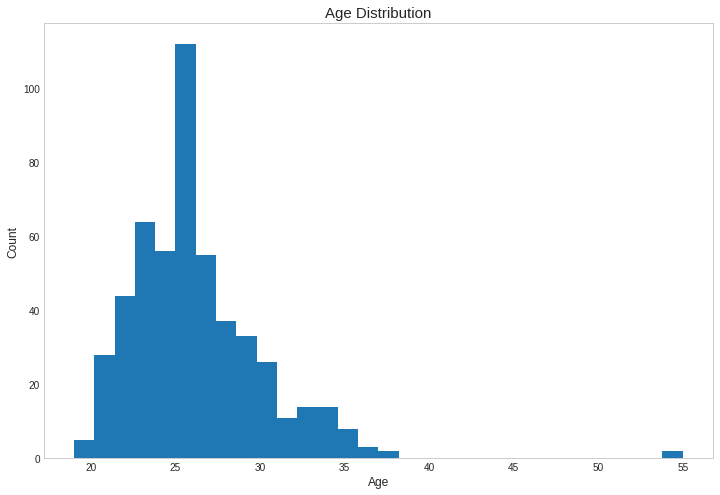

In [ ]:
ax = df.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

In [ ]:
df.age.agg(['mean', 'median', 'min', 'max', 'count'])

mean       26.126394
median     26.000000
min        19.000000
max        55.000000
count     269.000000
Name: age, dtype: float64

The different count might be due to the presence of some *Na's* in the age feature

There are no big differences in age, but we can see that the males at these events are slightly older than the female participants.

Next, we have information about the **race** of the participants.

In [ ]:
df['race'] = df.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df.race)
df_full['race'] = df_full.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df_full.race)
df_full['race_o'] = df_full.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df_full.race_o)
df.race.value_counts(dropna=False)

White       142
Asian        71
Hispanic     25
Other        16
Black        16
NaN           4
Name: race, dtype: int64

Mostly Caucasian participants, then Asian. It could either be a cultural thing or that these events were organized in specific areas with this demographic.

In [ ]:
df.race.value_counts(normalize=True)

White       0.550388
Asian       0.271318
Hispanic    0.075581
Other       0.060078
Black       0.042636
Name: race, dtype: float64

In [ ]:
df['field_cd'] = df.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(df.field_cd)
df_full['field_cd'] = df_full.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(df_full.field_cd)
df.field_cd.value_counts(dropna=False)

Soc. Sc.    69
Educ.       68
Nat. Sc.    60
Econ        57
Soc. Wr.    55
Pol. Sc.    48
Law         37
Journ.      30
Eng.        26
Arts        17
Hist.       16
Med. Sc.    12
Math        10
Film         6
NaN          4
Lang.        3
Oth.         2
Name: field_cd, dtype: int64

In [ ]:
df.field_cd.value_counts(normalize=True)

Soc. Sc.    0.133721
Educ.       0.131783
Nat. Sc.    0.116279
Econ        0.110465
Soc. Wr.    0.106589
Pol. Sc.    0.093023
Law         0.071705
Journ.      0.058140
Eng.        0.050388
Arts        0.032946
Hist.       0.031008
Med. Sc.    0.023256
Math        0.019380
Film        0.011628
Lang.       0.005814
Oth.        0.003876
Name: field_cd, dtype: float64

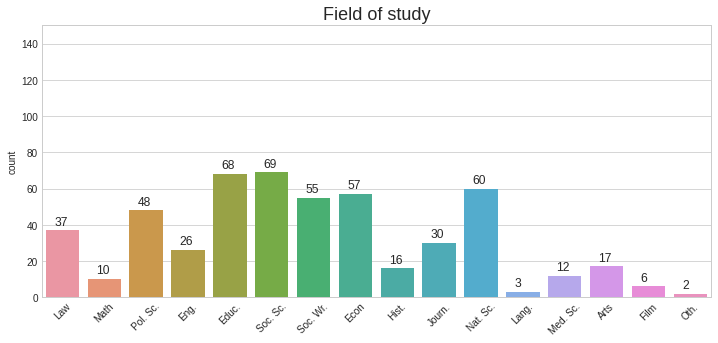

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x="field_cd", data=df)
plt.title('Field of study', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.ylim(0, 150)
plt.xlabel('')

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=12)

A great majority of business/finance/econ, followed by Natural Sciences (chemistry, physics) and Engineering. All of them very much male-dominated.

While Engineering, Finance, and Math are mostly male-dominated, Social and Medical Sciences, Arts, and Journalism are more female dominated. Natural Sciences, Political Science, and Film are very much equally represented by both genders.

## Do we care about race and religion?

In this subsection, we will focus on what the participants declare to be the level of importance of race and religion for them. Thus, let's keep in mind that this is what the participants are declaring, which **does not necessarily correspond to the truth**. 

Later, we will look for a way to test if these values are trustworthy or not.

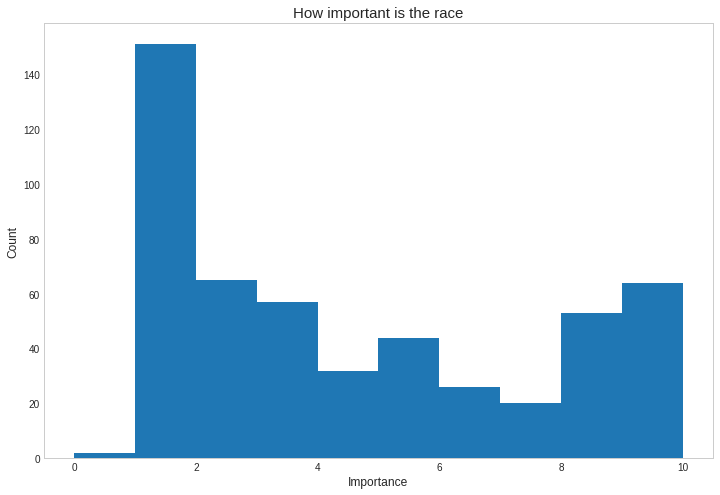

In [ ]:
ax = df.imprace.hist(bins=10, figsize=(12,8))
ax.set_title('How important is the race', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

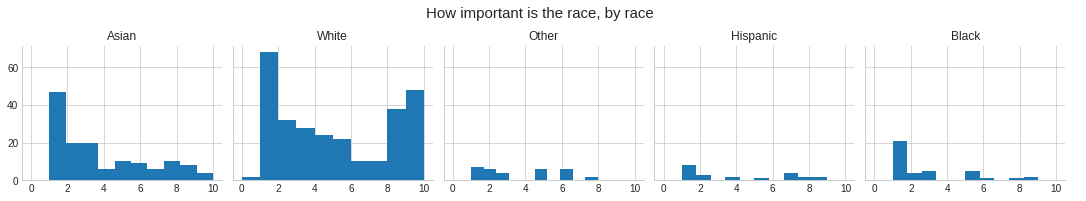

In [ ]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=15)
g.add_legend()

In [ ]:
df[['race', 'imprace']].groupby(['race']).agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
              mean median  min   max count
race                                      
Asian     3.635714    3.0  1.0  10.0   140
Black     4.045455    3.0  1.0   9.0    22
Hispanic  2.589744    1.0  1.0   9.0    39
Other     3.645161    3.0  1.0   8.0    31
White     4.652482    4.0  0.0  10.0   282

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


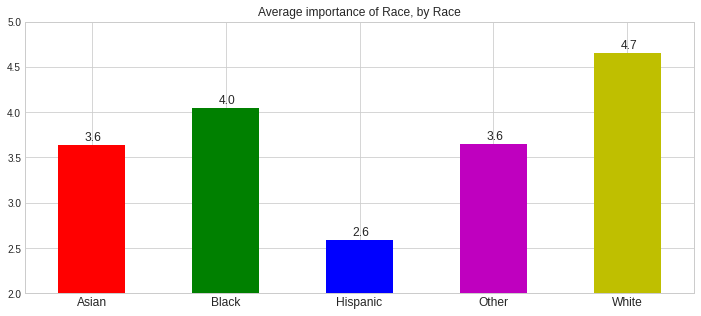

In [ ]:
ax = df[['race', 'imprace']].groupby('race').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Average importance of Race, by Race',
                                                   ylim=(2,5), color='rgbmy')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Caucasians give more importance to race than other races. One may wonder if gender plays a role in that

Females declare to care about race more than males. However, something interesting happens if we put race into the mix again.

This value seems to be very influenced by the gender of the participant consistently across all the races, with Caucasian females declaring the highest value and Black (and 'Other') participants with the highest gap between Males and Females. 

Next, we can focus on how important is the **religion**.

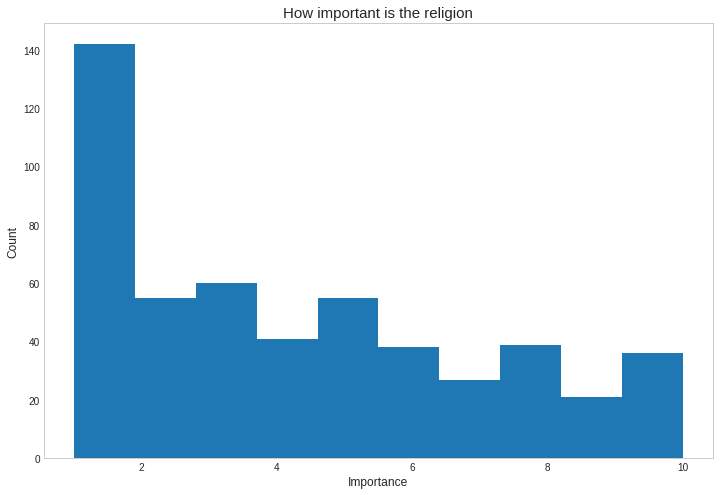

In [ ]:
ax = df.imprelig.hist(bins=10, figsize=(12,8))
ax.set_title('How important is the religion', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

Text(0.5, 0.98, 'How important is the religion, by race')

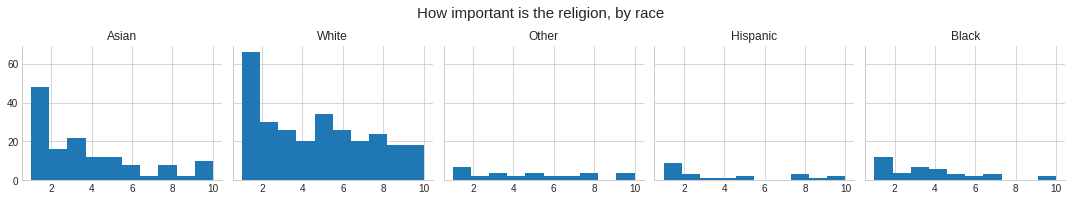

In [ ]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprelig', bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the religion, by race', fontsize=15)

In [ ]:
df[['race', 'imprelig']].groupby(['race']).agg(['mean', 'median', 'min', 'max', 'count'])

imprelig                        
              mean median  min   max count
race                                      
Asian     3.557143    3.0  1.0  10.0   140
Black     3.863636    2.0  1.0  10.0    22
Hispanic  3.410256    3.0  1.0  10.0    39
Other     4.806452    5.0  1.0  10.0    31
White     4.553191    4.0  1.0  10.0   282

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


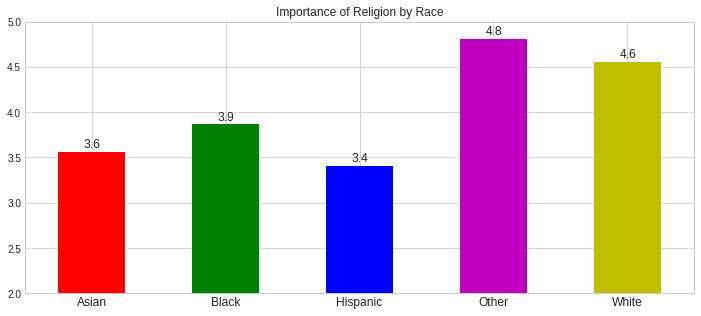

In [ ]:
ax = df[['race', 'imprelig']].groupby('race').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Importance of Religion by Race',
                                                   ylim=(2,5), color='rgbmy')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('', fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Again, we see that white participants declare higher values.

In [ ]:
df[['gender', 'imprelig']].groupby(['gender'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

imprelig                        
            mean median  min   max count
gender                                  
Female  4.180934    3.5  1.0  10.0   514

Again, female participants are declaring higher values

Thus, in general, Caucasian (and "Other") females declare to give more importance to race and religion than any other segment of the population. It is difficult to not notice how these differences between gender vary across the races. We notice again a big gap across gender in Black participants and in participants of 'Other' races. At last, it seems that Hispanic individuals are fairly united in giving importance to religion (on average), regardless of their gender.

## Are we sincere about it?

We could try to find a way to check whether or not the participants are declaring what they really feel. In particular, they are asked to communicate if they like their speed-date or not (as far as I understood, if they both like each other we call this a match). Although this might depend on many factors, we could try to see if the values we found above are trustworthy.

Since the data with the decisions are in the DataFrame with the repeated individuals (the original one), the next cell will prepare the data by counting how many times an individual gave positive feedback and how many times it was with a partner of the same race. 

It is easy (sums are associative) to see that the same results can be achieved by simply using the original DataFrame but it is a good exercise of data manipulation that I want to keep in the next hidden cell.

In [ ]:
sinc = df_full[['iid', 'dec', 'samerace']].groupby(['iid', 'samerace']).sum().unstack().fillna(0)
sinc = sinc.dec.rename(columns={0: 'dec_diff', 1: 'dec_same'})
tmp = df_full[['iid', 'wave', 'samerace']].groupby(['iid', 'samerace']).count().unstack().fillna(0)
tmp = tmp.wave.rename(columns={0: 'dates_diff', 1: 'dates_same'})
sinc = pd.merge(sinc, tmp, left_index=True, right_index=True)
sinc = sinc.reset_index()
df = pd.merge(df, sinc, on='iid')
del sinc

In [ ]:
tmp = (df.dec_diff.sum() + df.dec_same.sum()) / (df.dates_diff.sum() + df.dates_same.sum())
print('Rate of positive feedback on the partner: {}%'.format(round(tmp*100,2)))
tmp = (df.dec_same.sum()) / (df.dates_same.sum())
print('Rate of positive feedback on the partner of the same race: {}%'.format(round(tmp*100,2)))
tmp = (df.dec_diff.sum()) / (df.dates_diff.sum())
print('Rate of positive feedback on the partner of the a different race: {}%'.format(round(tmp*100,2)))

Rate of positive feedback on the partner: 36.26%
Rate of positive feedback on the partner of the same race: 39.32%
Rate of positive feedback on the partner of the a different race: 34.08%


It looks like there is some influence after all, let's try to go deeper.

In [ ]:
personal = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
df = df_full[['iid', 'wave'] + personal + evaluation + outcome + personal].drop_duplicates().copy()
# df = df[~df.index.duplicated()]
df = df[df['gender'] == 'Female']
# df = df[~df.index.duplicated()]


ValueError: ignored

In [ ]:
print('Rate of positive feedback on the partner of the same race, by race')
df[['dec','samerace', 'race']].groupby(['race','samerace']).mean()*100

Rate of positive feedback on the partner of the same race, by race


KeyError: ignored

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


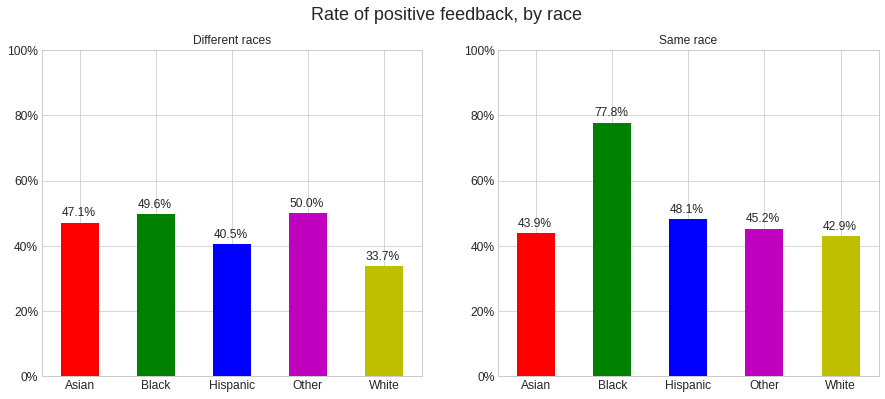

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

df_fem[df_fem.samerace==0][['race', 'dec']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Different races', ylim=(0,1),
                                                              color='rgbmy')

df_fem[df_fem.samerace==1][['race', 'dec']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Same race', ylim=(0,1),
                                                              color='rgbmy')

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

fig.suptitle('Rate of positive feedback, by race', fontsize=18)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

Every race, except for Asians and "Other" (which can include same race couples and we have no way to find out), sees a positive effect of being of the same race. Particularly impressive the effect on Black participants but we can't ignore that there are very few cases when 2 black individuals dated at these events.

In [ ]:
print('Rate of positive feedback on the partner of the same race, by gender')
df_full[['dec','samerace', 'gender']].groupby(['gender','samerace']).mean()*100

Rate of positive feedback on the partner of the same race, by gender


dec
gender samerace           
Female 0         34.718923
       1         39.324487
Male   0         47.397476
       1         47.466828

This looks like more in line with what was declared: the effect for males is negligible and more noticeable for females.

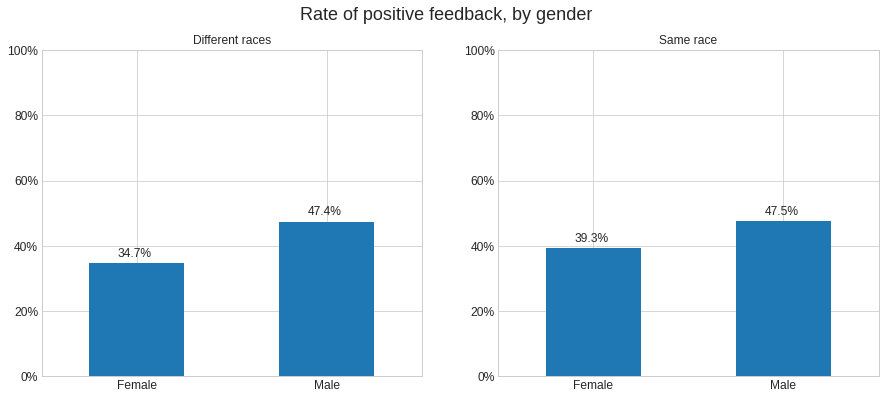

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

df_full[df_full.samerace==0][['gender', 'dec']].groupby('gender').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Different races', ylim=(0,1))

df_full[df_full.samerace==1][['gender', 'dec']].groupby('gender').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Same race', ylim=(0,1))

ax[0].set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

fig.suptitle('Rate of positive feedback, by gender', fontsize=18)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.15, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.15, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is de

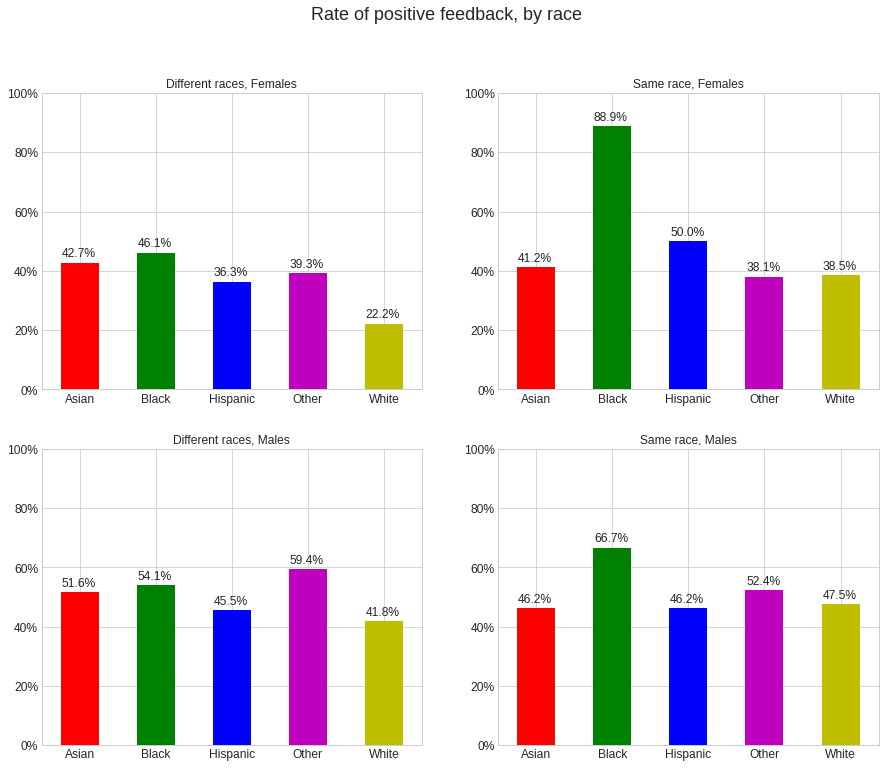

In [ ]:
fig, ax= plt.subplots(2,2, figsize=(15, 12))

df_full[(df_full.samerace==0) & (df_full.gender=='Female')][['race', 
                                       'dec']].groupby('race').mean().plot(kind='bar', ax=ax[0][0], legend=False,
                                                              title='Different races, Females', ylim=(0,1),
                                                              color='rgbmy')

df_full[(df_full.samerace==1) & (df_full.gender=='Male')][['race', 
                                        'dec']].groupby('race').mean().plot(kind='bar', ax=ax[1][1], legend=False,
                                                              title='Same race, Males', ylim=(0,1),
                                                              color='rgbmy')

df_full[(df_full.samerace==0) & (df_full.gender=='Male')][['race', 
                                       'dec']].groupby('race').mean().plot(kind='bar', ax=ax[1][0], legend=False,
                                                              title='Different races, Males', ylim=(0,1),
                                                              color='rgbmy')

df_full[(df_full.samerace==1) & (df_full.gender=='Female')][['race', 
                                        'dec']].groupby('race').mean().plot(kind='bar', ax=ax[0][1], legend=False,
                                                              title='Same race, Females', ylim=(0,1),
                                                              color='rgbmy')

ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0][0].set_xlabel('')
ax[1][0].set_xlabel('')
ax[0][1].set_xlabel('')
ax[1][1].set_xlabel('')
vals = ax[0][0].get_yticks()
ax[0][0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1][0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[0][1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1][1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

fig.suptitle('Rate of positive feedback, by race', fontsize=18)

for i in ax[0][0].patches:
    ax[0][0].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[1][0].patches:
    ax[1][0].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[0][1].patches:
    ax[0][1].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)
    
for i in ax[1][1].patches:
    ax[1][1].text(i.get_x()+.01, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

Now, this is interesting. We have seen that Females are less likely to give positive feedback (meaning, setting `dec=1`) than males. This is very evident in Caucasian females with a partner of a different race. This is very much in line with what was declared in the other question.

We have already noticed the high discrepancy between the declared importance and the feedback rate for Black individuals and this is again very evident for African American females since it appears they particularly liked the partners of the same race at the point that their rate is significantly higher than their male counterparts (as before, this happens only in a very few cases). A similar effect (but much smaller) can be observed for Hispanic participants.

For how interesting this is for me, **this result does not mean much in terms of causality**. There can be more important factors determining this kind of choice and we are looking at averages, thus smoothing out any kind of variability.

Before moving on, we can see how being of the same race has a positive effect regardless of what the individuals are declaring it important or not. Moreover, the effect is particularly large if the race is considered a very important factor.

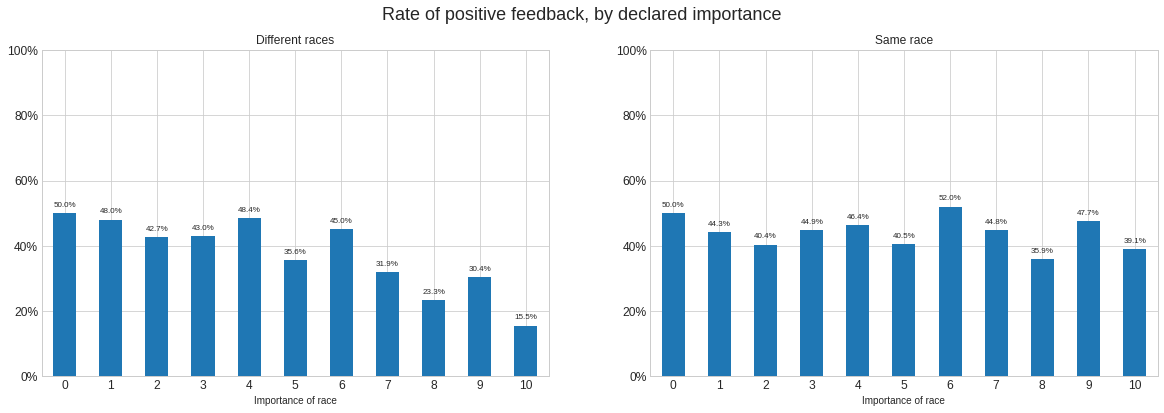

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(20, 6))

df_fem[df_fem.samerace==0][['imprace', 
                              'dec']].groupby('imprace').mean().unstack().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Different races', ylim=(0,1))

df_fem[df_fem.samerace==1][['imprace', 
                              'dec']].groupby('imprace').mean().unstack().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Same race', ylim=(0,1))

vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax[0].set_xticklabels(np.arange(11), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(np.arange(11), fontsize=12, rotation='horizontal')

ax[0].set_xlabel('Importance of race')
ax[1].set_xlabel('Importance of race')

fig.suptitle('Rate of positive feedback, by declared importance', fontsize=18)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.005, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=8)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.005, i.get_height()+.02, \
            str(round((i.get_height())*100, 1))+'%', fontsize=8)

## Goals and habits

In this subsection, we will see what the participants declared to be their intentions to be and what they usually do in terms of going out and dating.

In [ ]:
df['goal'] = df.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df.goal)
df_full['goal'] = df_full.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df_full.goal)
df.goal.value_counts(dropna=False)

Fun             228
Meet            189
Date             40
IdidIt           35
Other            30
Relationship     22
NaN               7
Name: goal, dtype: int64

In [ ]:
df_fem['goal'] = df_fem.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'}).fillna(df_fem.goal)
df_fem.goal.value_counts(dropna=False)

Fun             228
Meet            189
Date             40
IdidIt           35
Other            30
Relationship     22
NaN               7
Name: goal, dtype: int64

In [ ]:
df.head()

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3,dec_diff,dec_same,dates_diff,dates_same
0,1,1,Female,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN,7.0,1.0,9.0,1.0
1,2,1,Female,24.0,law,Law,NaN,NaN,NaN,White,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,4.0,2.0,8.0
2,3,1,Female,25.0,Economics,Math,NaN,NaN,NaN,White,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,8.0
3,4,1,Female,23.0,Law,Law,NaN,NaN,NaN,White,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,3.0,2.0,8.0
4,5,1,Female,21.0,Law,Law,NaN,NaN,NaN,White,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,6.0,2.0,8.0


In [ ]:
df_fem.head(25)

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,1,1,Female,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",Meet,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN
10,2,1,Female,24.0,law,Law,NaN,NaN,NaN,White,2.0,5.0,Alabama,"35,223","65,929.00",Fun,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN
20,3,1,Female,25.0,Economics,Math,NaN,NaN,NaN,White,8.0,4.0,Connecticut,"6,268",NaN,Other,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,Female,23.0,Law,Law,NaN,NaN,NaN,White,1.0,1.0,Texas,"77,096","37,754.00",Fun,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN
40,5,1,Female,21.0,Law,Law,NaN,NaN,NaN,White,8.0,1.0,Bowdoin College,"94,022","86,340.00",Meet,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN
50,6,1,Female,23.0,law,Law,NaN,NaN,NaN,Asian,1.0,1.0,MD,"20,878","60,304.00",Fun,3.0,1.0,lawyer,1.0,10.0,8.0,9.0,7.0,8.0,7.0,9.0,2.0,6.0,9.0,2.0,5.0,6.0,6.0,4.0,1.0,1.0,4.0,3.0,4.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN
60,7,1,Female,22.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Southern California,"91,360","54,620.00",Fun,5.0,1.0,Law,1.0,5.0,3.0,4.0,10.0,10.0,10.0,2.0,3.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,7.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,8,1,Female,25.0,Masters in Public Administration,Pol. Sc.,NaN,NaN,NaN,White,1.0,1.0,"London, England",0,NaN,Fun,5.0,1.0,Journalist,6.0,2.0,2.0,1.0,10.0,9.0,9.0,3.0,2.0,10.0,8.0,10.0,9.0,9.0,6.0,6.0,8.0,6.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,9,1,Female,26.0,Masters in Public Administration,Pol. Sc.,NaN,NaN,NaN,Other,1.0,1.0,"Palm Springs, California",0,NaN,Fun,4.0,1.0,"Congresswoman, and comedian",9.0,4.0,3.0,1.0,8.0,6.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,9.0,8.0,3.0,6.0,15.0,1.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
90,10,1,Female,26.0,Masters of Social Work&Education,Pol. Sc.,NaN,NaN,NaN,White,4.0,4.0,94115,"19,335","48,652.00",Meet,6.0,1.0,To create early childhood intervention programs,9.0,9.0,9.0,9.0,7.0,6.0,6.0,7.0,1.0,7.0,8.0,5.0,6.0,7.0,7.0,8.0,7.0,7.0,7.0,10.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN


Most of the people declare to be there to have fun and meet new people. Let's see if there is some trend in gender or race.

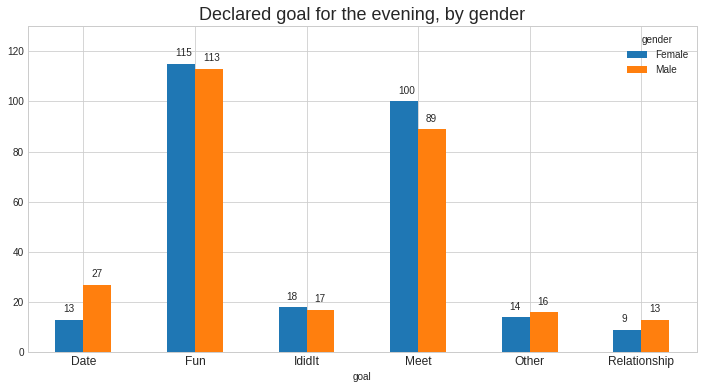

In [ ]:
tmp = df[['gender', 'goal']].groupby(['goal', 'gender']).size().unstack()
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,130))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('Declared goal for the evening, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=10)

The two genders mainly differ in their intentions about finding a date (twice as many more males declare that) or meeting someone new (it turns out that girls do not *just want to have fun* but also want to meet someone new).

Let's see how often they declare to **go out**.

In [ ]:
df['go_out'] = df.go_out.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                             4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                             7: 'Almost_never'}).fillna(df.go_out)
df_full['go_out'] = df_full.go_out.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                             4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                             7: 'Almost_never'}).fillna(df_full.go_out)
df.go_out.value_counts(dropna=False)

Twice_pw        191
Several_pw      177
Once_pw         127
Twice_pm         29
Once_pm          12
NaN               7
Several_py        6
Almost_never      2
Name: go_out, dtype: int64

In [ ]:
pd.crosstab(df.go_out, df.goal, normalize='index')

goal,Date,Fun,IdidIt,Meet,Other,Relationship
go_out,,,,,,
Almost_never,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Once_pm,0.000000,0.333333,0.166667,0.250000,0.083333,0.166667
Once_pw,0.078740,0.401575,0.062992,0.362205,0.047244,0.047244
Several_pw,0.062147,0.446328,0.073446,0.322034,0.062147,0.033898
Several_py,0.166667,0.166667,0.000000,0.333333,0.000000,0.333333
Twice_pm,0.068966,0.310345,0.034483,0.517241,0.068966,0.000000
Twice_pw,0.083770,0.439791,0.057592,0.335079,0.052356,0.031414


* Most of the people declare to go out on a weekly basis and they are mostly here to have fun.
* Both the participants that declared to almost never go out were there to meet someone new.
* Participants going out on a yearly basis are in proportion more interested in finding a date or a serious relationship than the others.

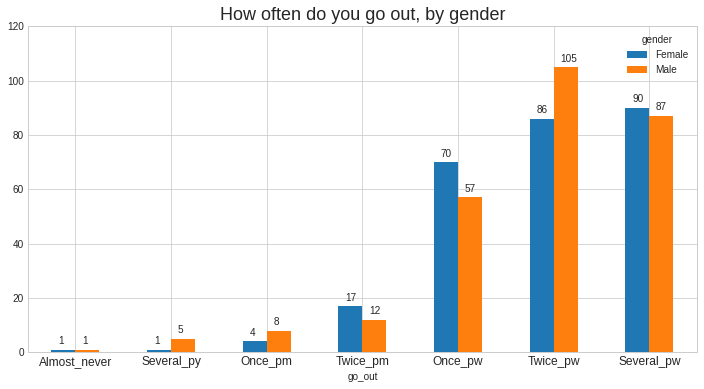

In [ ]:
tmp = df[['gender', 'go_out']].groupby(['gender', 'go_out']).size().unstack(0)
tmp = tmp.reindex(['Almost_never', 'Several_py',
                   'Once_pm', 'Twice_pm',
                   'Once_pw', 'Twice_pw', 'Several_pw'])
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,120))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('How often do you go out, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=10)

On the 2 extremes (Several times per week and almost never) the two genders look very similar with some difference in going out once or twice per week and once or twice per month. 


In [ ]:
df[['race', 'go_out']].groupby(['race', 'go_out']).size().unstack().fillna(0)

go_out,Almost_never,Once_pm,Once_pw,Several_pw,Several_py,Twice_pm,Twice_pw
race,,,,,,,
Asian,2.0,5.0,42.0,36.0,2.0,11.0,38.0
Black,0.0,3.0,8.0,4.0,0.0,3.0,8.0
Hispanic,0.0,0.0,11.0,10.0,0.0,2.0,19.0
Other,0.0,0.0,8.0,13.0,2.0,1.0,13.0
White,0.0,4.0,58.0,114.0,2.0,12.0,113.0


Participants that declare to go out almost never (for how scarce) are both Asians, while Caucasian participants are equally likely to go out twice or several times per week.

At last, let's see how is the dating life of our participants.

In [ ]:
df['date'] = df.date.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                         4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                         7: 'Almost_never'}).fillna(df.date)
df_full['date'] = df_full.date.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                         4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                         7: 'Almost_never'}).fillna(df_full.date)
df.date.value_counts(dropna=False)

Several_py      136
Twice_pm        131
Once_pm          99
Almost_never     94
Once_pw          54
Twice_pw         22
NaN               8
Several_pw        7
Name: date, dtype: int64

In [ ]:
pd.crosstab(df.date, df.goal, normalize='index')

goal,Date,Fun,IdidIt,Meet,Other,Relationship
date,,,,,,
Almost_never,0.063830,0.361702,0.074468,0.414894,0.074468,0.010638
Once_pm,0.050505,0.444444,0.080808,0.292929,0.050505,0.080808
Once_pw,0.111111,0.574074,0.000000,0.240741,0.037037,0.037037
Several_pw,0.000000,0.714286,0.000000,0.000000,0.142857,0.142857
Several_py,0.051471,0.352941,0.058824,0.433824,0.051471,0.051471
Twice_pm,0.091603,0.435115,0.083969,0.328244,0.053435,0.007634
Twice_pw,0.181818,0.363636,0.045455,0.272727,0.045455,0.090909


* Not surprisingly, many of them date very seldom. In general, the distribution of their dating life is skewed in the opposite way with respect to the one of their social activity.
* The ones that are dating a lot are here for fun but 14% of them looks for a serious relationship

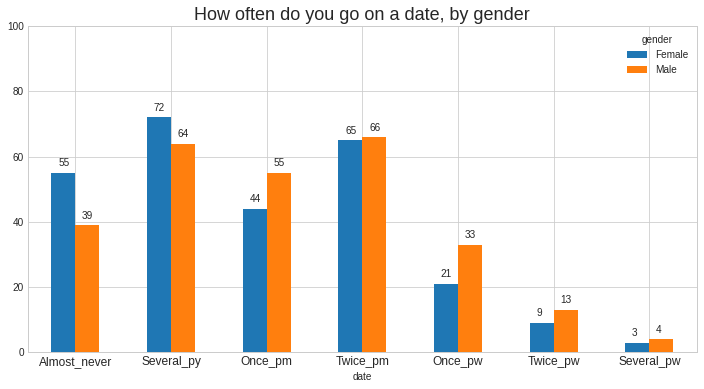

In [ ]:
tmp = df[['gender', 'date']].groupby(['gender', 'date']).size().unstack(0)
tmp = tmp.reindex(['Almost_never', 'Several_py',
                   'Once_pm', 'Twice_pm',
                   'Once_pw', 'Twice_pw', 'Several_pw'])
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,100))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('How often do you go on a date, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x()+.07, i.get_height()+2, \
            str(round((i.get_height()), 1)), fontsize=10)

In [ ]:
df[['race', 'date']].groupby(['race', 'date']).size().unstack().fillna(0)

date,Almost_never,Once_pm,Once_pw,Several_pw,Several_py,Twice_pm,Twice_pw
race,,,,,,,
Asian,35.0,21.0,9.0,2.0,36.0,27.0,6.0
Black,4.0,5.0,0.0,0.0,10.0,6.0,1.0
Hispanic,8.0,6.0,1.0,0.0,15.0,12.0,0.0
Other,3.0,6.0,8.0,0.0,9.0,9.0,2.0
White,44.0,61.0,36.0,5.0,66.0,77.0,13.0


In [ ]:
df[['race', 'gender', 'date']].groupby(['race', 'gender', 'date']).size().unstack().fillna(0)

date             Almost_never  Once_pm  Once_pw  Several_pw  Several_py  \
race     gender                                                           
Asian    Female          17.0     10.0      3.0         2.0        20.0   
         Male            18.0     11.0      6.0         0.0        16.0   
Black    Female           3.0      3.0      0.0         0.0         7.0   
         Male             1.0      2.0      0.0         0.0         3.0   
Hispanic Female           4.0      3.0      1.0         0.0        10.0   
         Male             4.0      3.0      0.0         0.0         5.0   
Other    Female           2.0      1.0      4.0         0.0         5.0   
         Male             1.0      5.0      4.0         0.0         4.0   
White    Female          29.0     27.0     13.0         1.0        30.0   
         Male            15.0     34.0     23.0         4.0        36.0   

date             Twice_pm  Twice_pw  
race     gender                      
Asian    Female      16.0       3.0  
         Male        11.0       3.0  
Black    Female       3.0       0.0  
         Male         3.0       1.0  
Hispanic Female       7.0       0.0  
         Male         5.0       0.0  
Other    Female       4.0       0.0  
         Male         5.0       2.0  
White    Female      35.0       6.0  
         Male        42.0       7.0

In this case, Asian people declare to date less often, in general females date less than males but in the asian case the trend is reversed.

## Interests

Here, we look at what the participants declare to be their interest in various activities

In [ ]:
def many_hist(cols):
    num = len(cols)
    rows = int(num/2) + (num % 2 > 0)
    fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
    i = 0
    j = 0
    for feat in cols:
        df[feat].hist(label=feat, ax=ax[i][j])
        ax[i][j].set_title(feat, fontsize=12)
        ax[i][j].grid(False)
        j = (j+1)%2
        i = i + 1 - j

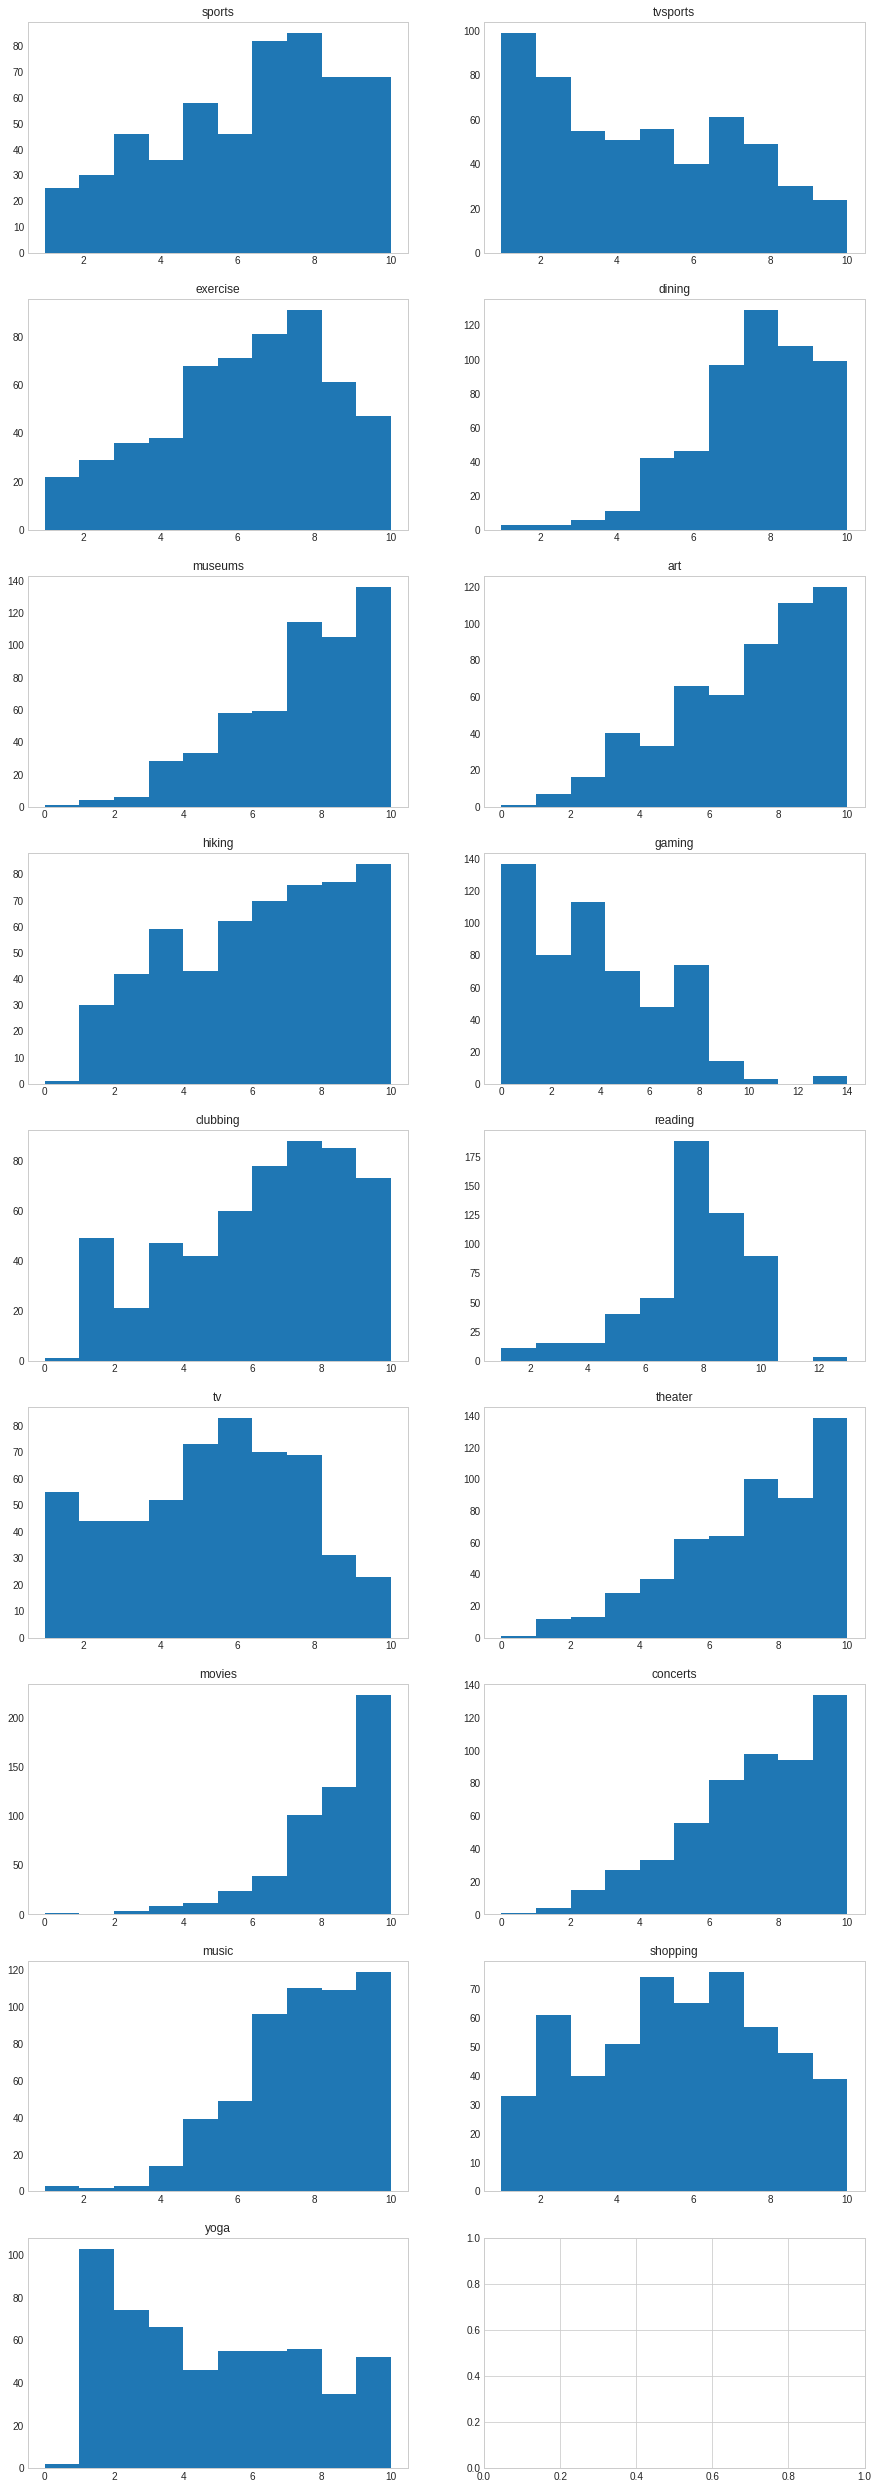

In [ ]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']
many_hist(interests)

Text(0.5, 1.0, 'Correlation between interests')

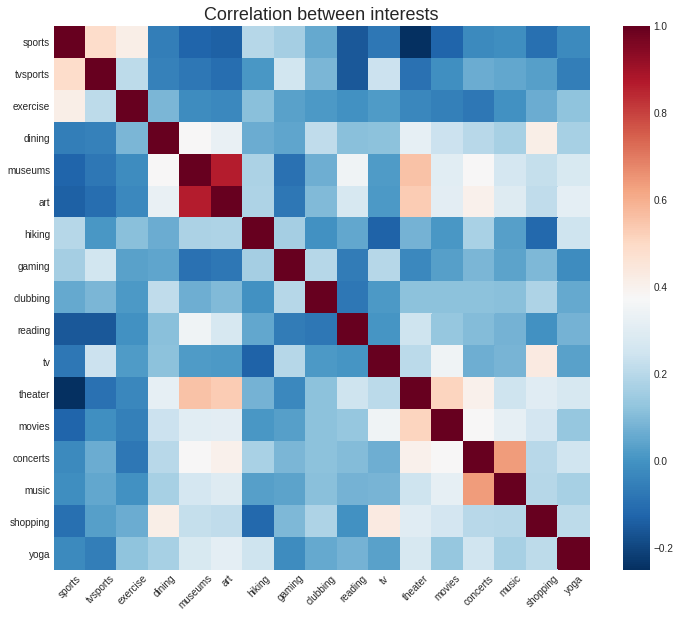

In [ ]:
corr = df[interests].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)

There is not much going on here, we notice that not surpringly liking art comes with liking museums, liking music with liking concerts, and liking sports with liking watching sports (but no correlation with liking ecercises for male participants, as we see in the next graph). Moreover, theater and sports do not seem to appeal the same people, especially for Female participants.

Text(0.5, 1.0, 'Females')

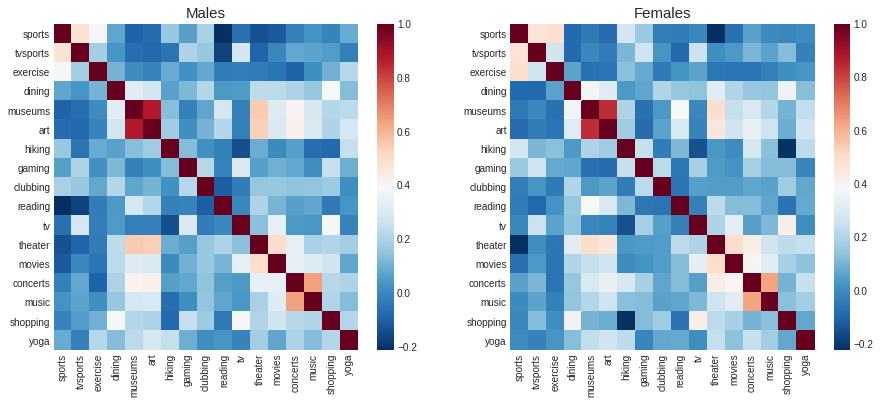

In [ ]:
corr_m = df[df.gender=='Male'][interests].corr()
corr_f = df[df.gender=='Female'][interests].corr()

fig, ax= plt.subplots(1,2, figsize=(15, 6))
sns.heatmap(corr_m, cmap='RdBu_r', ax=ax[0])
sns.heatmap(corr_f, cmap='RdBu_r', ax=ax[1])

ax[0].set_title('Males', fontsize=15)
ax[1].set_title('Females', fontsize=15)

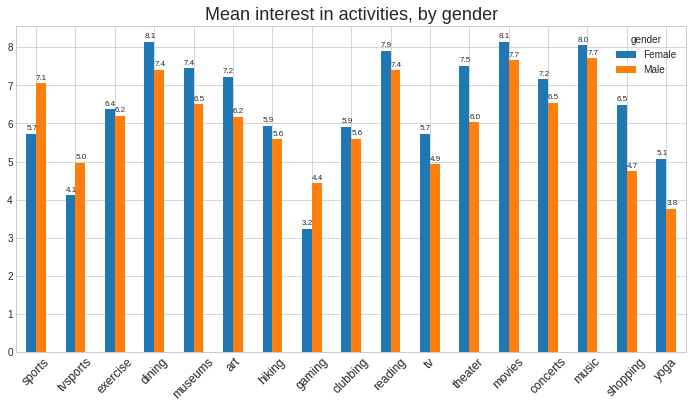

In [ ]:
tmp = df[['gender']+ interests].groupby(['gender']).mean().stack().unstack(0)
ax = tmp.plot(kind='bar', figsize=(12,6))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Mean interest in activities, by gender', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

Interestingly, with the exception of Sports, tv sports, and gaming, female participants have an higher average interest than their male counterparts in every activity.

Text(0.5, 1.0, 'Mean interest in activities, by race')

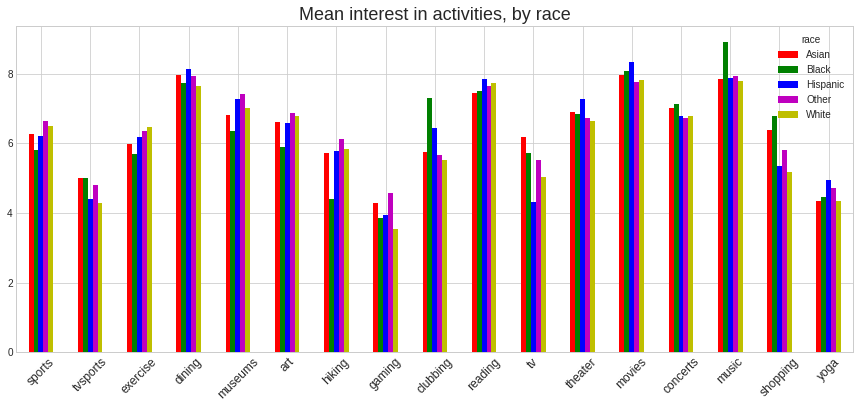

In [ ]:
tmp = df[['race']+ interests].groupby(['race']).mean().stack().unstack(0)
ax = tmp.plot(kind='bar', figsize=(15,6),color='rgbmy')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Mean interest in activities, by race', fontsize=18)

* People like more doing sports and exercising than watching it on tv, white people in particular
* Black people are not much into museums and art, but they do like music and clubbing
* Asians like tv a lot, while Hispanics not so much, preferring activities like reading, or going to theaters and movies

Every time I express myself in this way, I mean it as a description of this sample of participants, not of the population.

## Expectations

Another set of questions that can produce interesting answers are the one regarding the expectations of each participant

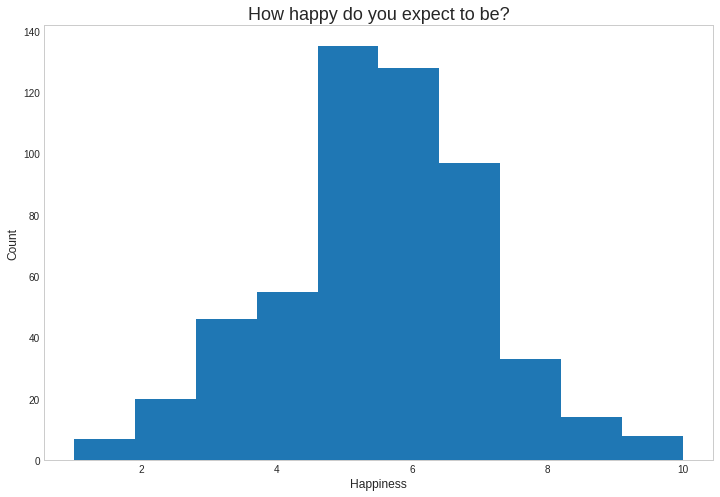

In [ ]:
ax = df.exphappy.hist(bins=10, figsize=(12,8))
ax.set_title('How happy do you expect to be?', fontsize=18)
ax.set_xlabel('Happiness',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

As we did several times already, let's try to find some differences between genders and races.

In [ ]:
df[['gender', 'exphappy']].groupby(['gender']).agg(['mean', 'median', 'min', 'max', 'count'])

exphappy                        
            mean median  min   max count
gender                                  
Female  5.179104    5.0  1.0  10.0   268
Male    5.850909    6.0  1.0  10.0   275

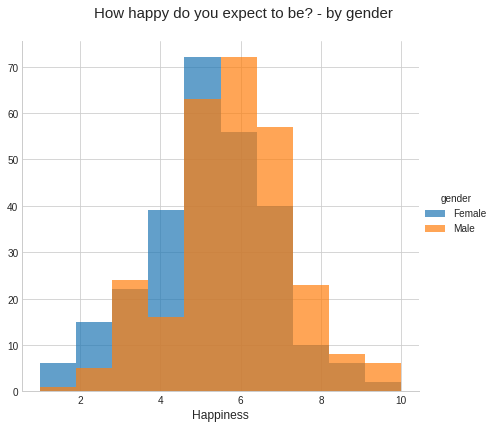

In [ ]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'exphappy', alpha= 0.7, bins=10)
g.set_xlabels('Happiness', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How happy do you expect to be? - by gender', fontsize=15)
g.add_legend()

Males are more optimistic about the evening, while no significant differences can be observed if we split by race.

The next question is: *Out of the 20 people you will meet, how many do you expect will be interested in dating you? *

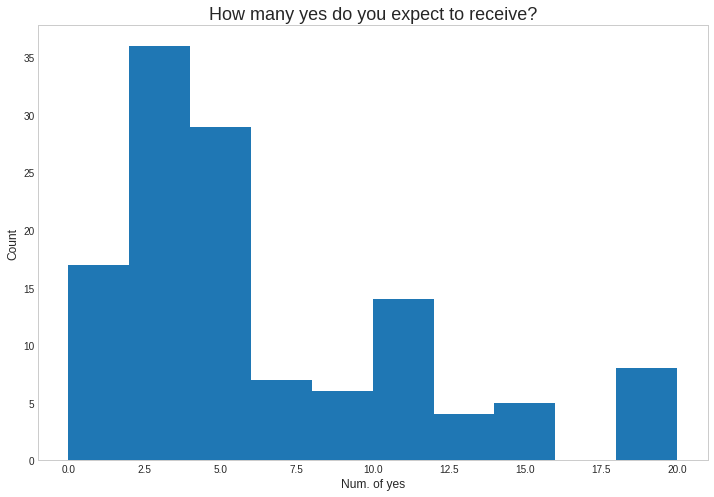

In [ ]:
ax = df.expnum.hist(bins=10, figsize=(12,8))
ax.set_title('How many yes do you expect to receive?', fontsize=18)
ax.set_xlabel('Num. of yes',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

In [ ]:
df[['gender', 'expnum']].groupby(['gender']).agg(['mean', 'median', 'min', 'max', 'count'])

expnum                        
            mean median  min   max count
gender                                  
Female  5.870968    4.0  0.0  20.0    62
Male    5.906250    4.0  0.0  20.0    64

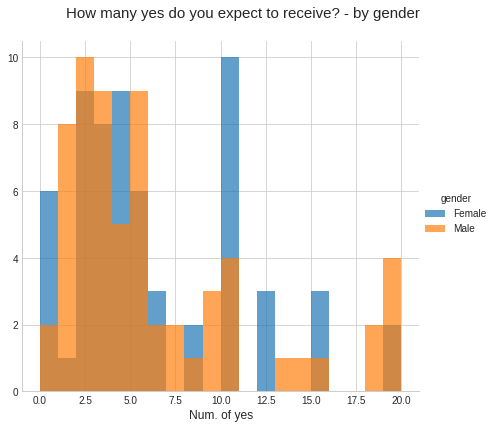

In [ ]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'expnum', alpha= 0.7, bins=20)
g.set_xlabels('Num. of yes', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('How many yes do you expect to receive? - by gender', fontsize=15)
g.add_legend()

There is no much difference in the averages, but it is easy to notice that a much larger proportion of males are very very confident while Females are more common in expecting a 50/50 success rate. 

I find curious also how a very low expectation (0 or 1) is expressed differently across genders, with Females preferring to set 0 and Males setting 1.

At last, in asking 500 people to rate an expecation from 1 to 20,  there are some values that are never picked, something that we might need to consider if we want to model on that.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


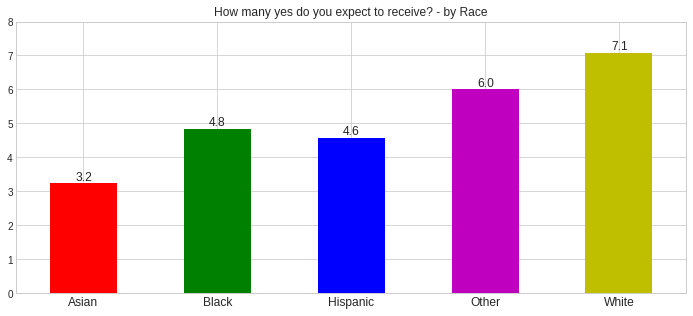

In [ ]:
ax = df[['race', 'expnum']].groupby(['race']).mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='How many yes do you expect to receive? - by Race',
                                                   color='rgbmy', ylim=(0,8))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('', fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+0.19, i.get_height()+.1, \
            str(round((i.get_height()), 1)), fontsize=12)

This is a much evident difference in expectations across races, something that we couldn't quite observe in the expectation of happiness.

All that being said, this question is not clear because each wave had a different number of partipants and it appears to be present only for the first 5 waves

In [ ]:
df[['expnum', 'wave']].groupby('wave').sum()

,expnum
wave,
1,166.0
2,150.0
3,86.0
4,186.0
5,154.0
6,0.0
7,0.0
8,0.0
9,0.0


# Breaking the Waves

As the last example showed us, there can be some differences in the way the data were collected across the waves. Moreover, the documentation already tells us that the participants could express their preferences using different scales in different waves (1- 10 or assign 100 points across various categories), or that in wave 12 they could say yes to only half of the people they met, or that sometimes they had to bring a book or a magazine. All these factors can influence our analysis and our models. 

We will explore some of these effects in this section.

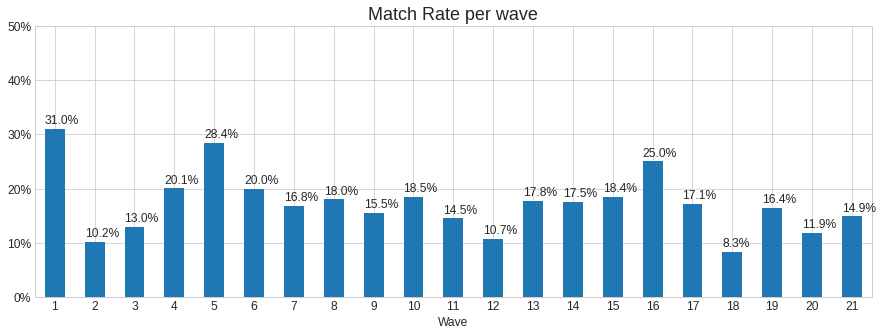

In [ ]:
 ax = df_full[['wave', 'match']].groupby('wave').mean().plot(kind='bar', legend=False, figsize=(15,5),
                                                        ylim=(0,0.5))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Match Rate per wave', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

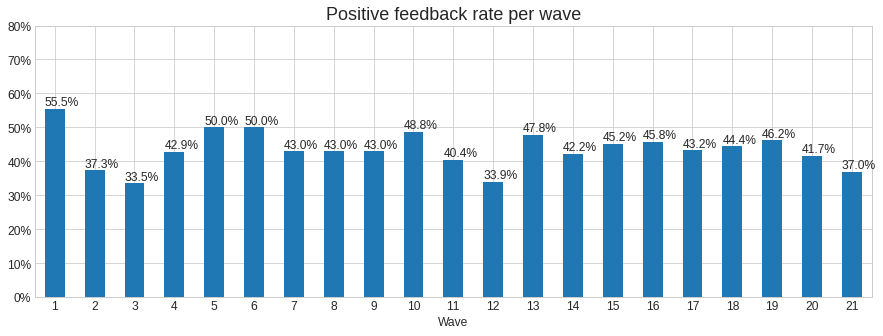

In [ ]:
ax = df_full[['wave', 'dec']].groupby('wave').mean().plot(kind='bar', legend=False, figsize=(15,5),
                                                        ylim=(0,0.8))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Positive feedback rate per wave', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

We see that asking people to be more selective in wave 12 led to a lower match and positive feedback rate, but nothing that didn't happen in other waves as well. 

We can also see something happening in the waves were people were asked to bring a book or a magazine but drawing any conclusion about it would be premature and probably very wrong.

The one thing that I want to understand is if I can compare the preference scores of waves 6 to 9 (every category on a scale from 1 to 10) with the ones of the other waves (assign 100 points in total).

In [ ]:
you_look = [col for col in df_full.columns if '1_1' in col] # what you look for in the opposite sex
other_look =  [col for col in df_full.columns if '4_1' in col] # you think other like you look for in the opposite sex
opp_look = [col for col in df_full.columns if '2_1' in col] # you think the opposite sex look for in you
you_score = [col for col in df_full.columns if '3_1' in col] # how do you score yourself
they_score = [col for col in df_full.columns if '5_1' in col] # the others score you
print(you_look)

['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']


In [ ]:
tmp = df_full[['iid'] + you_look + other_look + opp_look + you_score + they_score].drop_duplicates()
df = pd.merge(df, tmp, on='iid')
df.head()

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3,dec_diff,dec_same,dates_diff,dates_same,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
0,1,1,Female,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",Meet,Almost_never,Several_pw,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN,7.0,1.0,9.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,Female,24.0,law,Law,NaN,NaN,NaN,White,2.0,5.0,Alabama,"35,223","65,929.00",Fun,Once_pm,Several_pw,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,4.0,2.0,8.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,Female,25.0,Economics,Math,NaN,NaN,NaN,White,8.0,4.0,Connecticut,"6,268",NaN,Other,Once_pw,Several_pw,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,8.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
3,4,1,Female,23.0,Law,Law,NaN,NaN,NaN,White,1.0,1.0,Texas,"77,096","37,754.00",Fun,Once_pm,Several_pw,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,3.0,2.0,8.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
4,5,1,Female,21.0,Law,Law,NaN,NaN,NaN,White,8.0,1.0,Bowdoin College,"94,022","86,340.00",Meet,Twice_pm,Several_pw,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,6.0,2.0,8.0,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,6.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
tmp_norm = df[(df.wave < 6) | (df.wave > 9)].copy()
tmp_diff = df[(df.wave > 5) & (df.wave < 10)].copy()
tmp_diff[['wave']+you_look+other_look].head(10)

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
130,6,16.67,16.67,16.67,16.67,16.67,16.67,10.0,7.0,7.0,7.0,5.0,7.0
131,6,12.77,19.15,17.02,17.02,14.89,19.15,7.0,7.0,7.0,7.0,6.0,7.0
132,6,6.67,20.00,20.00,17.78,20.00,15.56,6.0,9.0,9.0,7.0,7.0,6.0
133,6,18.18,22.73,18.18,13.64,13.64,13.64,8.0,8.0,8.0,9.0,9.0,7.0
134,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,6,17.39,17.39,15.22,17.39,13.04,19.57,9.0,6.0,5.0,8.0,5.0,8.0
136,6,20.00,20.00,20.00,20.00,6.67,13.33,9.0,9.0,7.0,8.0,3.0,7.0
137,6,18.75,16.67,18.75,20.83,12.50,12.50,10.0,9.0,8.0,9.0,3.0,8.0
138,6,18.60,16.28,18.60,18.60,11.63,16.28,7.0,9.0,8.0,7.0,7.0,9.0
139,6,20.83,20.83,16.67,16.67,6.25,18.75,10.0,9.0,4.0,7.0,8.0,8.0


In the above example, there is a respondent from wave 6 (thus that should score from 1 to 10 each category independently) that for some question had their scores converted to the other scale (assign 100 points to the categories) and some other questions were left intact. I am afraid I won't be able to use these questions or to use all the waves at the same time

The following charts are thus describing any wave but the ones between the 6th and the 9th.

In [ ]:
tmp_norm[['wave']+you_look+other_look].sample(10)

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
402,15,25.00,14.00,25.00,25.00,3.00,8.00,27.0,10.0,20.0,25.0,4.0,14.0
279,11,20.00,20.00,20.00,15.00,5.00,20.00,35.0,20.0,1.0,19.0,1.0,24.0
80,4,10.00,10.00,20.00,20.00,20.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN
344,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,13,20.00,10.00,20.00,20.00,15.00,15.00,30.0,5.0,10.0,30.0,15.0,10.0
313,12,6.67,19.05,42.86,9.52,14.29,7.62,20.0,15.0,15.0,15.0,20.0,15.0
420,16,30.00,25.00,20.00,10.00,10.00,5.00,45.0,5.0,10.0,20.0,10.0,10.0
252,11,25.00,7.00,25.00,25.00,8.00,10.00,25.0,10.0,15.0,15.0,15.0,20.0
88,4,25.00,15.00,20.00,20.00,20.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
267,11,20.00,10.00,30.00,15.00,15.00,10.00,30.0,5.0,20.0,30.0,5.0,10.0


Text(0.5, 0.98, 'What do you look for in the opposite sex?')

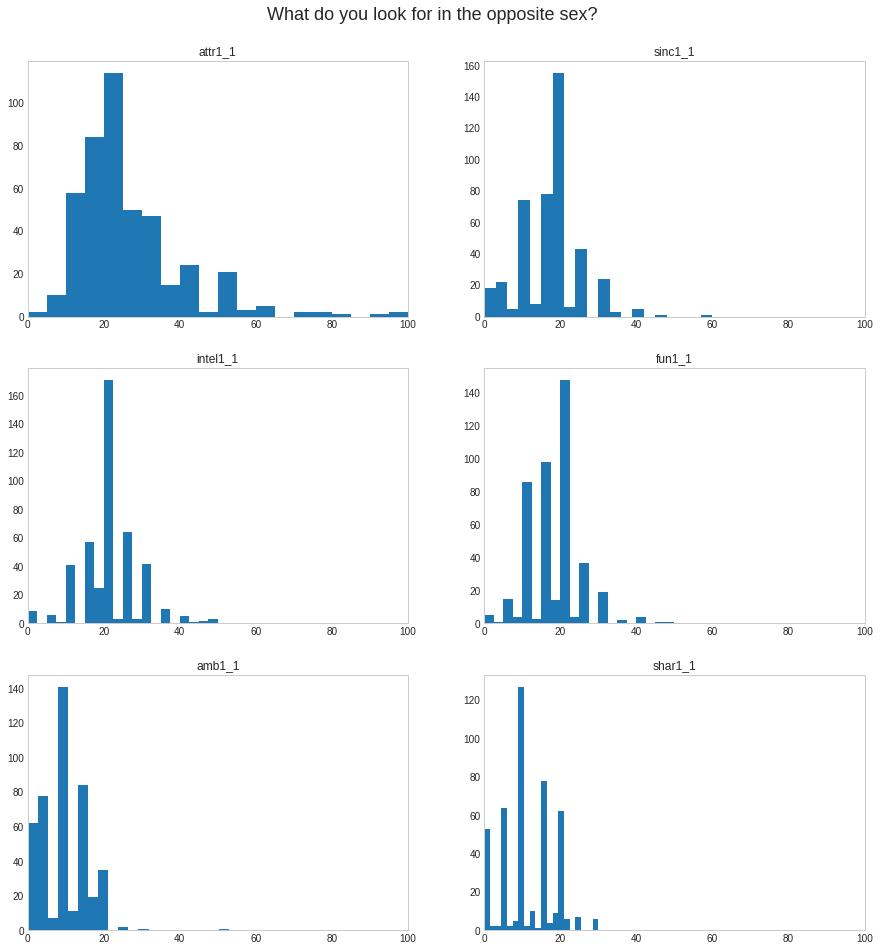

In [ ]:
num = len(you_look)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in you_look:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=20)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].set_xlim(0,100)
    j = (j+1)%2
    i = i + 1 - j

plt.subplots_adjust(top=0.93)
fig.suptitle('What do you look for in the opposite sex?', fontsize=18)

Text(0.5, 0.98, 'What you think MOST of your fellow men/women look for in the opposite sex?')

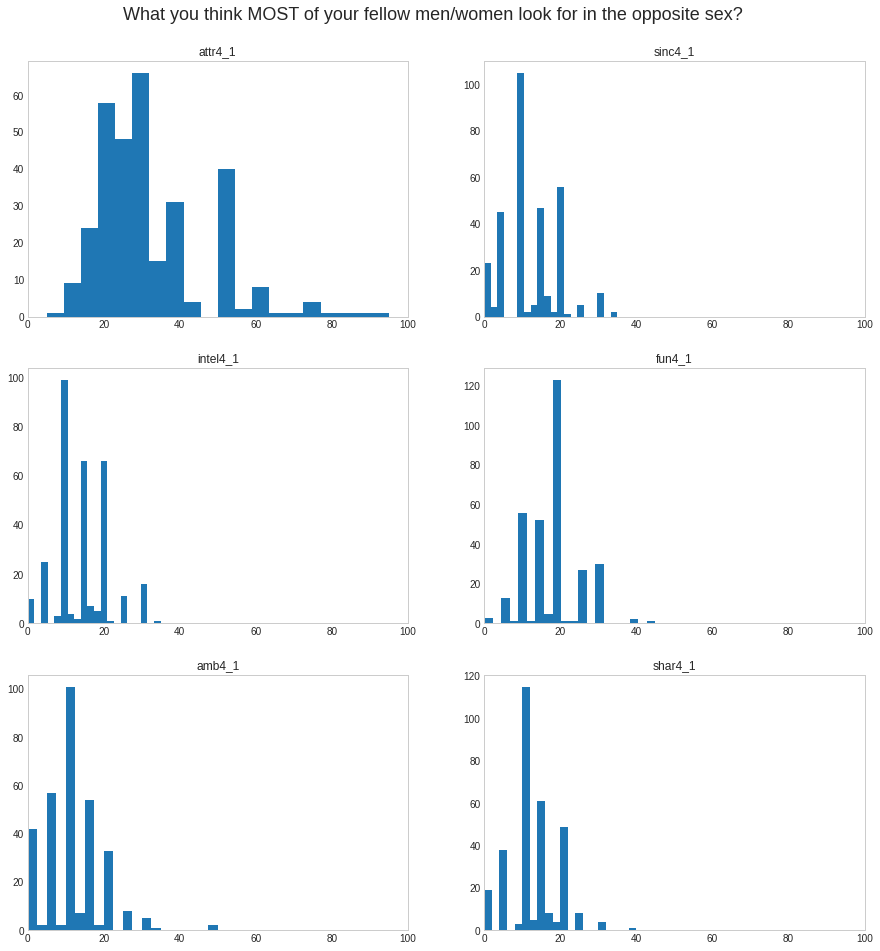

In [ ]:
num = len(other_look)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in other_look:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=20)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].set_xlim(0,100)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('What you think MOST of your fellow men/women look for in the opposite sex?', fontsize=18)

Text(0.5, 0.98, 'What do you think the opposite sex looks for in a date?')

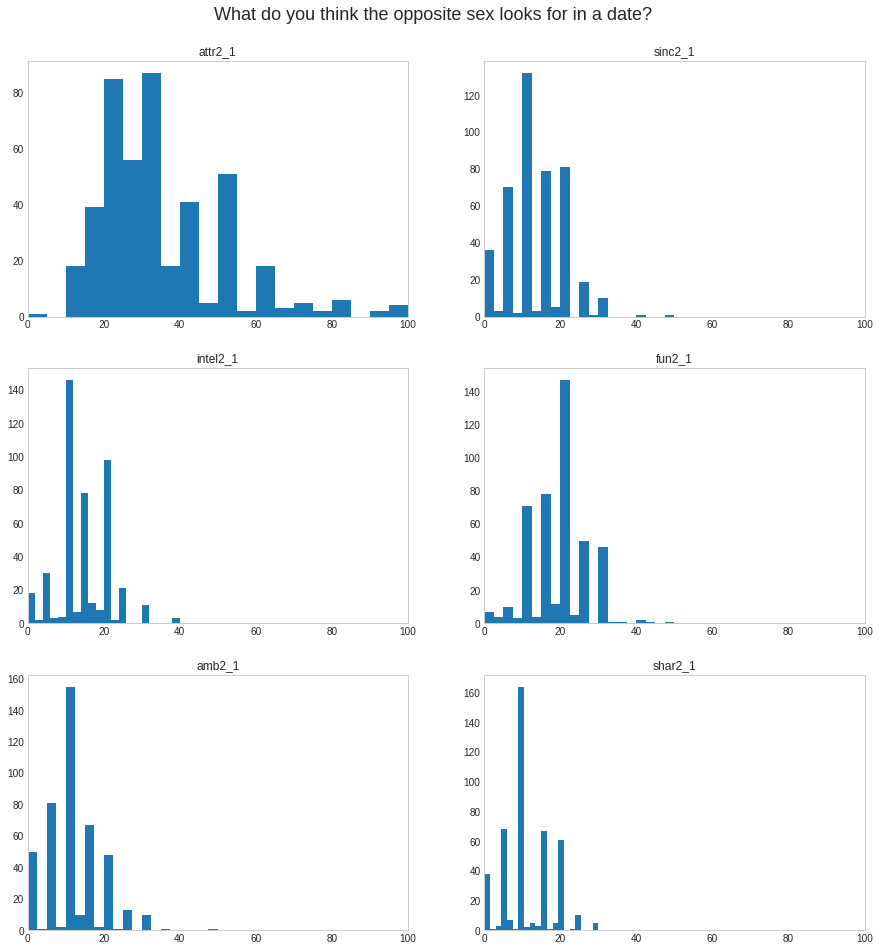

In [ ]:
num = len(opp_look)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in opp_look:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=20)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].set_xlim(0,100)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('What do you think the opposite sex looks for in a date?', fontsize=18)

A few things pop out:

* People clearly rated attractiveness in the first place, then realized that they had to score up to a 100 and focused on very simple multiples of 5 and 10. This has to be taken into account if we want to model on that: these features are not continuous.
* The participants look for all the categories more or less equally in general, but having shared interests and being ambitious are generally less important.
* People generally think that attractiveness is as important as other things (with some exceptions) and also that everyone else (same gender and opposite gender) value this aspect much more.

Let's then see how they score themselves and how they think they are perceived

Text(0.5, 0.98, 'How do you think you measure up?')

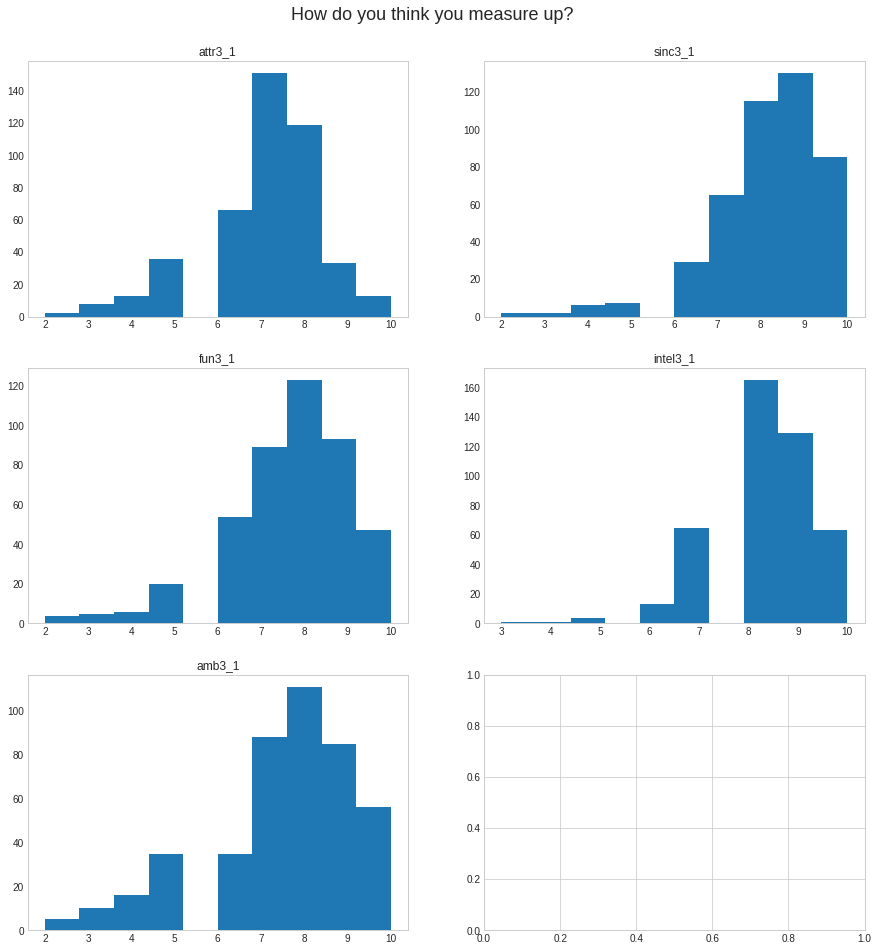

In [ ]:
num = len(you_score)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in you_score:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=10)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you think you measure up?', fontsize=18)

Text(0.5, 0.98, 'How do you think others perceive you?')

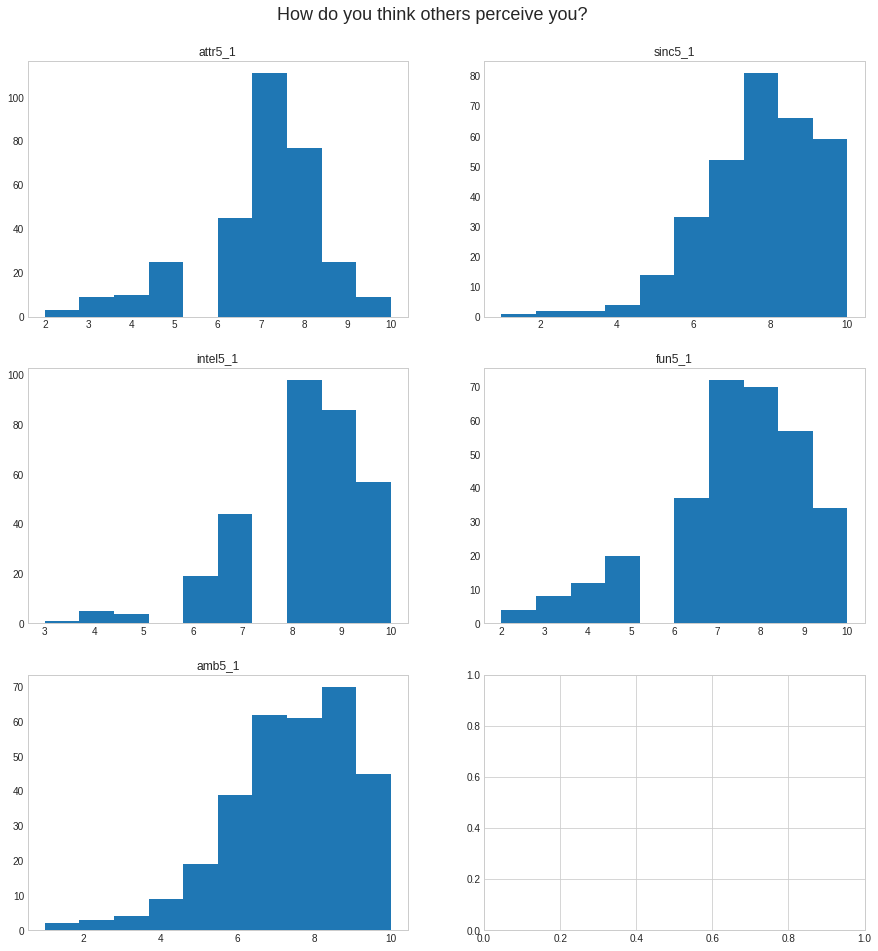

In [ ]:
num = len(they_score)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in they_score:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=10)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you think others perceive you?', fontsize=18)

They are all **fairly confident**.

Text(0.5, 1.0, 'Correlation between evaluations')

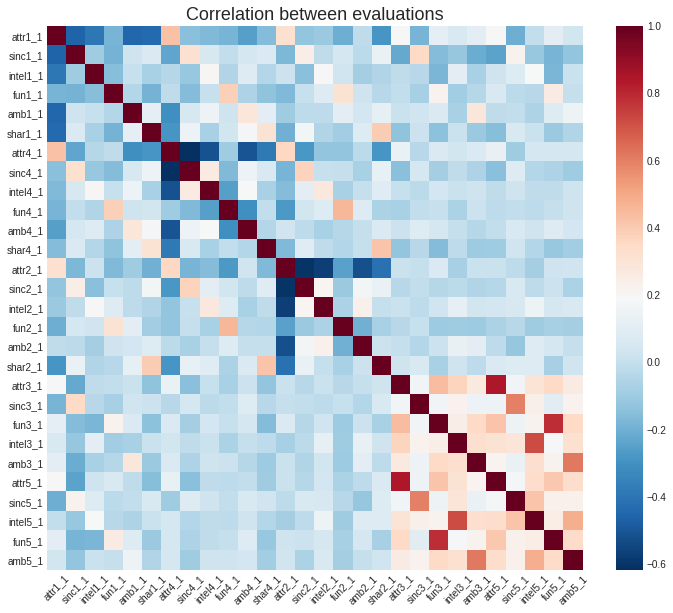

In [ ]:
corr = tmp_norm[you_look + other_look + opp_look + you_score + they_score].corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between evaluations', fontsize=18)

We indeed see that the scores they expect and how they measure themselves are very correlated, in particular on Attractive, Fun, and Intelligent. There is another correlation between the ways they think being fun or sharing interest is valued by their same gender and the opposite one. Opposite correlation between how they think other people value being attractive and the other categories, a correlation that becomes positive again if we look at how they think the two genders value this aspect.

The questions we explored in the previous section were then repeated half-way through the session, right after the session, and weeks after it. However, no significant change can be observed.

# Rating and deciding

Before getting into the modeling, we can explore one more thing: how do we rate a partner that we like and how do we rate one that we don't?

The participants were given a scorecard to fill at the end of each speed dating, communicating their decision, their rating about the other person, and their expectation. Let's see if we can spot some pattern in that.

For this analysis, we have to use the original DataFrame and we will pretend that we are a little different every time we meet someone new (we are not, maybe we can pretend a bit) so that we suddenly have more than 8 thousands individuals.

In [ ]:
df = df_full[['iid', 'race', 'gender', 'field_cd', 'dec', 'match', 'int_corr', 'samerace', 'met',
             'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].copy()
df.head(5)

,iid,race,gender,field_cd,dec,match,int_corr,samerace,met,attr,sinc,intel,fun,amb,shar,like,prob
0,1,Asian,Female,Law,1,0,0.14,0,2.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,Asian,Female,Law,1,0,0.54,0,1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,Asian,Female,Law,1,1,0.16,1,1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,1,Asian,Female,Law,1,1,0.61,0,2.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,Asian,Female,Law,1,1,0.21,0,2.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0


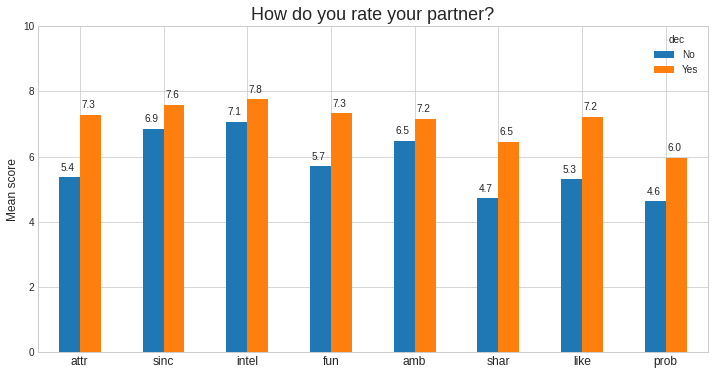

In [ ]:
tmp = df[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].groupby('dec').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'No', 1: 'Yes'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,10))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('How do you rate your partner?', fontsize=18)
ax.set_ylabel('Mean score', fontsize=12)

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+0.2, \
            str(round((i.get_height()), 1)), fontsize=10)

Text(0.5, 0.98, 'How do you rate your partner?')

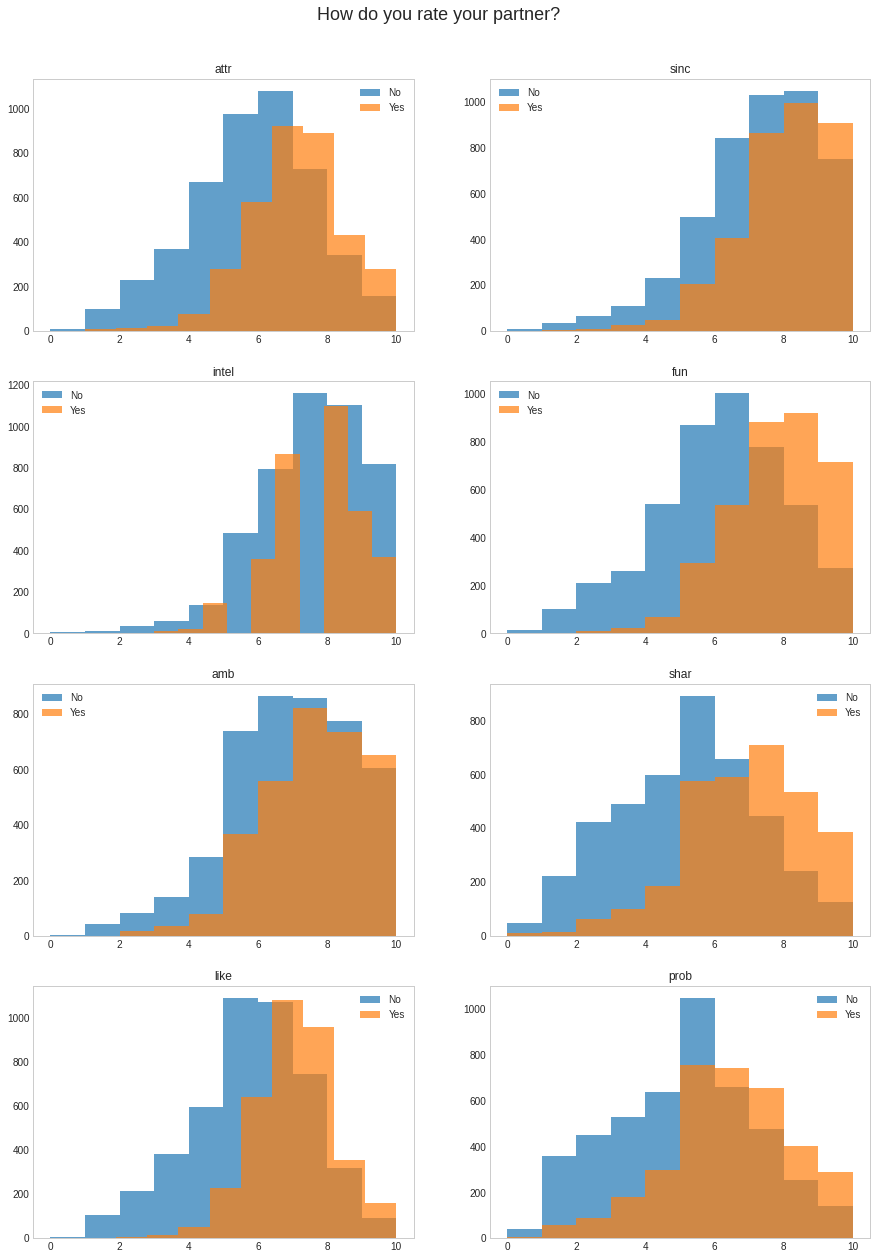

In [ ]:
feats = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

num = len(feats)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats:
    df[df.dec==0][feat].hist(label='No', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.dec==1][feat].hist(label='Yes', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you rate your partner?', fontsize=18)

Text(0.5, 1.0, 'Yes')

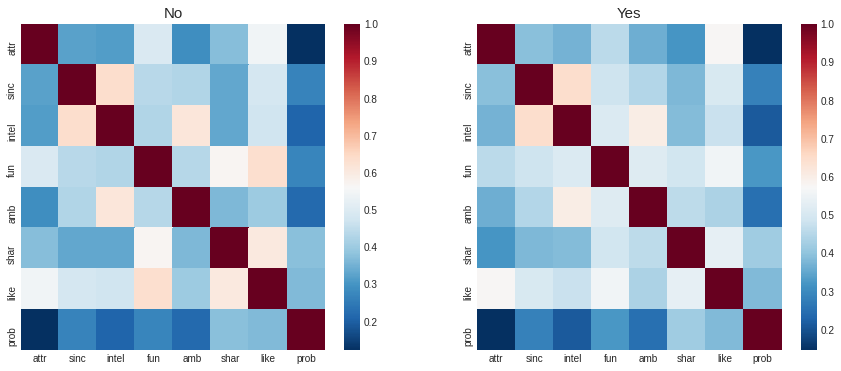

In [ ]:
corr_m = df[df.dec==0][feats].corr()
corr_f = df[df.dec==1][feats].corr()

fig, ax= plt.subplots(1,2, figsize=(15, 6))
sns.heatmap(corr_m, cmap='RdBu_r', ax=ax[0])
sns.heatmap(corr_f, cmap='RdBu_r', ax=ax[1])

ax[0].set_title('No', fontsize=15)
ax[1].set_title('Yes', fontsize=15)

As expected, higher rates lead to positive decisions, with the higher gaps in Attractive, and 'How much do you like them' (coincidentally it is also the same gap). We also notice, however, that positive feedback can arrive even if the score in some categories is very low, with the exception of Intelligence, where there is a minimum of 3 to get positive feedback. 

It looks like being Fun is making quite the difference in the decision, while being Sincere looks not influential.

Looking at the correlations: 
* it seems that the negative correlation between Attractive and Sincere or Intelligent (which are always positively correlated) is getting milder when the decision is positive (although the causal link can easily go in the opposite direction). 
* interesting to see how rating a person as ambitious or attractive is reducing the expectations of the participants about being liked by them. Not so confident after all.
* when the decision is negative we can observe a positive correlation between the Like score and the Fun one that is not observed in cases of positive feedback (a fancy way of saying "I like you as a friend"?)

Interestingly, the relation between higher ratings and being of the same race is not observed, not necessarily in contrast with what was discussed before. In other words, although we observed that dates between people of the same race were having a higher rate of positive feedback and we observed that positive feedback comes with generally higher grades, we can't say that people are giving to partners of the same race higher grades. **Being of the same race is expected to be a big factor in predicting the individual decisions**.

Text(0.5, 0.98, 'How do you rate your partner?')

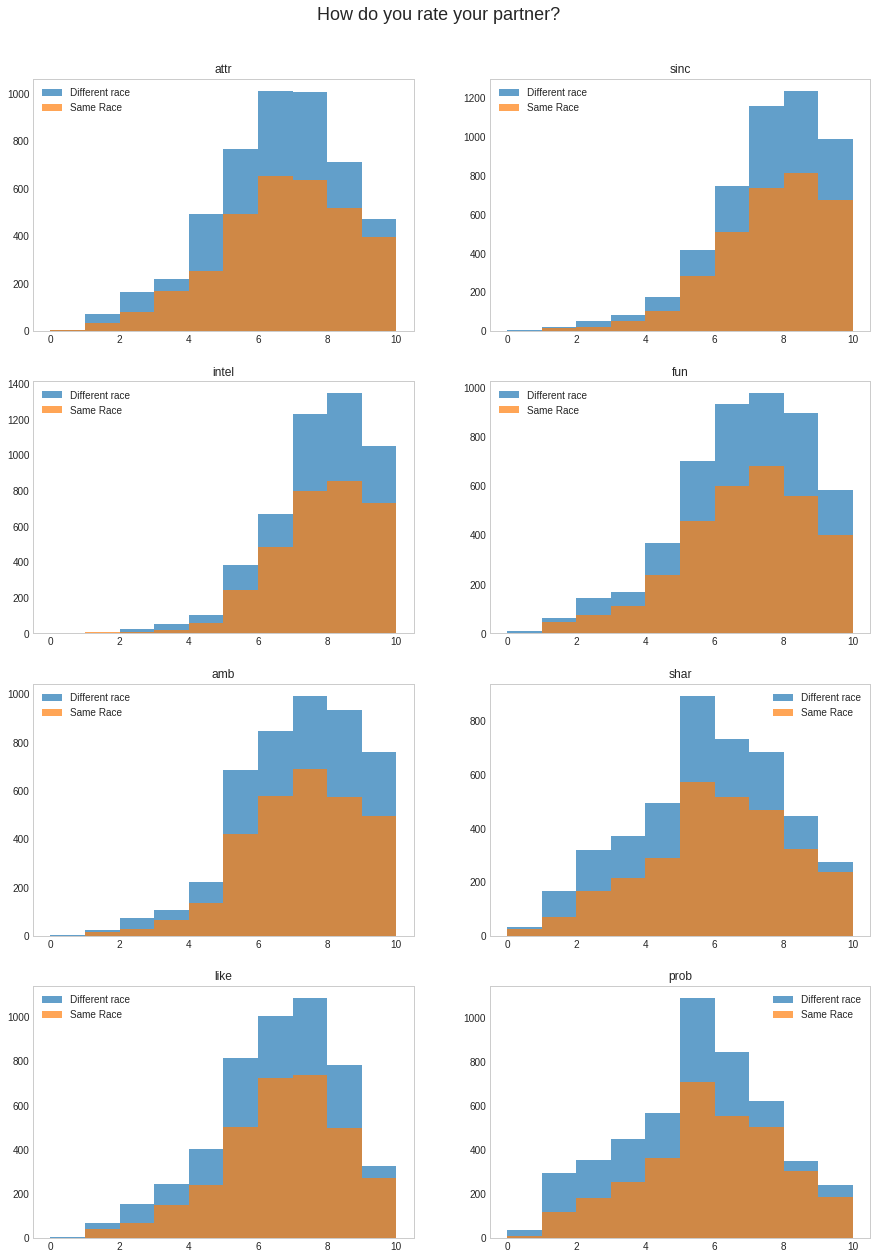

In [ ]:
feats = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

num = len(feats)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats:
    df[df.samerace==0][feat].hist(label='Different race', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.samerace==1][feat].hist(label='Same Race', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you rate your partner?', fontsize=18)

A model that takes into consideration both participants and partners can change its mind, but only for Hispanic and Black people that like 8 or more. While the *partner model*, the one that wants to predict the decision of someone it has no information about, relying solely on its confidence, will expect a yes only from people it judges attractive 3 at best, then it expect only `No`. In particular, it expect only very unattractive Black participants to say `yes` to it, while White and Hispanic participants can be also mildly unattactive to make it hope for a `yes`.

Very sad indeed.

We could go on but we are now at version 35 and nobody wants really keep going with this.

# Conclusions

This kernel allowed me to explore some questionnaire data about a topic we can all more or less relate to. I would like to conclude by summarizing some of the findings.

* These events attracted some segments of the population more than others, making this sample most likely not representative of the population.
* We observed a relationship between gender, race, and how important are race and religion, with the gender having a much higher weight.
* We have seen how the participants generally declared to not give much importance to race but were also generally more inclined to give positive feedback about their date if the partner was of their same race.
* People of different races like almost the same things, with some exceptions (see the subsection on interests)
* White participants are way more optimistic than their Asians counterparts.
* We have a data science-ish way of saying *I like you as a friend* 
* Participants were fairly confident before the sessions but, in rating their expectations after every date, they looked not so confident if they liked the partner, especially if they were attractive.
* How much the participant found their partners attractive (or other key attributes) is way more important of shared interest, race, and field of study.
* Not knowing how much the date is appreciated (with respect to the key attributes above) makes a machine guess the outcome of the date with significantly less accuracy. But the more you know about the partner, the better (in terms of accuracy of the prediction)
* It is more difficult to predict what an *art lover* (or movies, or clubbing) will decide after 4 minutes of date, while it is very possible, for example, for a *tv lover*.
* Predicting the decision of someone without using their information is very hard and even harder if they are males.
* Even a machine *thinks* that people will say `yes` if they find their date very attractive and `no` if they don't more than it actually happens. On the other side, it ignores how people actually like very sincere dates.
* On a typical date, these models are very negative and picky. 
* At least they behave in the same way for Males and Females and ignore almost always the race of us human to make their prediction (which can go as high as 86% in accuracy).

Thank you for reading this far, it has been a great exercise for my EDA skills and I am very glad of the support while I was drafting my 35 versions.

Please keep the feedback coming and improve this kernel as much as you like.

It has been a lot of fun for me, I hope for you too
 
 Cheers